# Sommaire
 * [ I - Importation ](#chapter1)
   * [ Nettoyage & Analyse](#section_1_1)
   * [Liens entre les variables](#section_1_2)
   * [Test de Shapiro-Wilk](#section_1_3)
   * [Test Kolmogorov Smirnov](#section_1_4)
 * [II - Régréssion Linéaire](#chapter2)
   * [Régression Linéaire Création](#section_2_1)
   * [Création du modèle simple](#section_2_2)
   * [Test du modèle](#section_2_3)
   * [Normalité des Résidus et Homoscédacité](#section_2_4)
   * [Régression Linéaire multiple ](#section_2_5)
   * [Vérification des erreurs et Coeff de Détermination](#section_2_6)
   * [Normalité des Résidus, Homoscédacité, QQ-plot](#section_2_7)
   * [Vérification des colinéaritées ou VIF ](#section_2_8)
   * [Analyse de nos 2 modèles et Choix du modèle ](#section_2_9)
   * [Implémentation des valeurs manquantes](#section_2_10)
 * [Analyse en Composante Principale ou ACP](#chapter3)
   * [Création Matrice de donnée](#section_3_1)
   * [Calcul en Composante Principal](#section_3_2)
   * [Graphique: Cercle des Corrélations ](#section_3_3)
 *  [Clustering Kmeans](#chapter4)
   * [La Méthode du Elbow](#section_4_1)
   * [Evaluation du Modèle](#section_4_2)
   * [Calcul des scores](#section_4_3)
   * [ Courbe ROC](#section_4_4)
 * [Regression Logistique](#chapter5)
   * [Création du modèle ](#section_5_1)
   * [GridsearchCv ](#section_5_2)
   * [Evaluation du Modèle](#section_5_3)
   * [Calcul des scores ](#section_5_4)
   * [Courbe ROC](#section_5_5)
 * [KNN](#chapter6)
   * [Création du modèle ](#section_6_1)
   * [GridsearchCv ](#section_6_2)
   * [Evaluation du Modèle](#section_6_3)
   * [Calcul des scores ](#section_6_4)
   * [Courbe ROC](#section_6_5)
 * [ Comparaison des modèles ](#chapter7)

## Chapitre I - Importation  <a class="anchor" id="chapter1"></a>

### Nettoyage & Analyse <a class="anchor" id="section_1_1"></a>

In [1]:
import pandas as pd
import numpy as np 
import pylab
import pickle

# Bibliothèque Graphique

import matplotlib.pyplot as plt
import seaborn as sns

# Bibliothèque Apprentisage
from sklearn.model_selection import train_test_split,validation_curve,learning_curve,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# Bibliothèque Stastistique
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model as sml
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

from scipy.stats import shapiro
from scipy.stats import levene
from scipy import stats
import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster


import warnings

In [2]:
sns.set()

warnings.filterwarnings('ignore')

In [3]:
Df_Billet=pd.read_csv('billets.csv',delimiter=';')

In [4]:
Df_Billet.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [5]:
Df_Billet.info()
Df_Billet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


(1500, 7)

Nous disposons actuellement de six informations géométriques sur un billet :

    length : la longueur du billet (en mm) ;
    
    height_left : la hauteur du billet (mesurée sur le côté gauche, en mm) ;
    
    height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;
    
    margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
    
    margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
    
    diagonal : la diagonale du billet (en mm).

In [6]:
# On décrit notre jeu de données

Df_Billet.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [7]:
#on vérifie si des Nan apparaisse dans notre fichier 
Df_Billet.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
Df_Billet.isnull().mean()

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      0.024667
margin_up       0.000000
length          0.000000
dtype: float64

Text(0.5, 1.0, 'Représentation graphique avec moyenne et médiane')

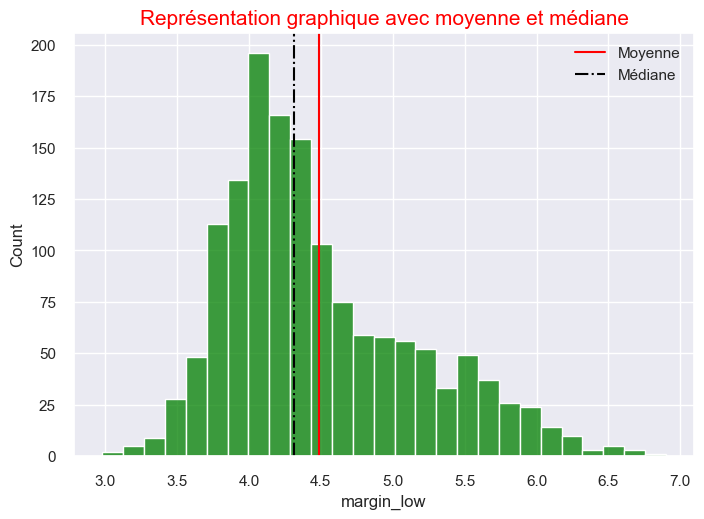

In [9]:
moyenne=Df_Billet['margin_low'].mean()
médiane=Df_Billet['margin_low'].median()
sns.histplot(data=Df_Billet,x='margin_low',color='green',edgecolor='white')
plt.axvline(moyenne, color='Red',linestyle='-')
plt.axvline(médiane, color='black',linestyle='-.')

plt.legend({'Moyenne': moyenne,'Médiane':médiane})
plt.title(label='Représentation graphique avec moyenne et médiane',fontsize=15,color='red')

In [10]:
Df_Billet.duplicated().sum()

0

 Nous pouvons voir que nous avons 37 Nan qui représente 2% de notre Dataframe et il y'a 0 doublons

In [11]:
# Création d'un dataframe sans les NAN qui représente 2% de la quantité de donnée 

Df_Billet_sans_nan=Df_Billet.dropna()

### Liens entre les Variables <a class="anchor" id="section_1_2"></a>

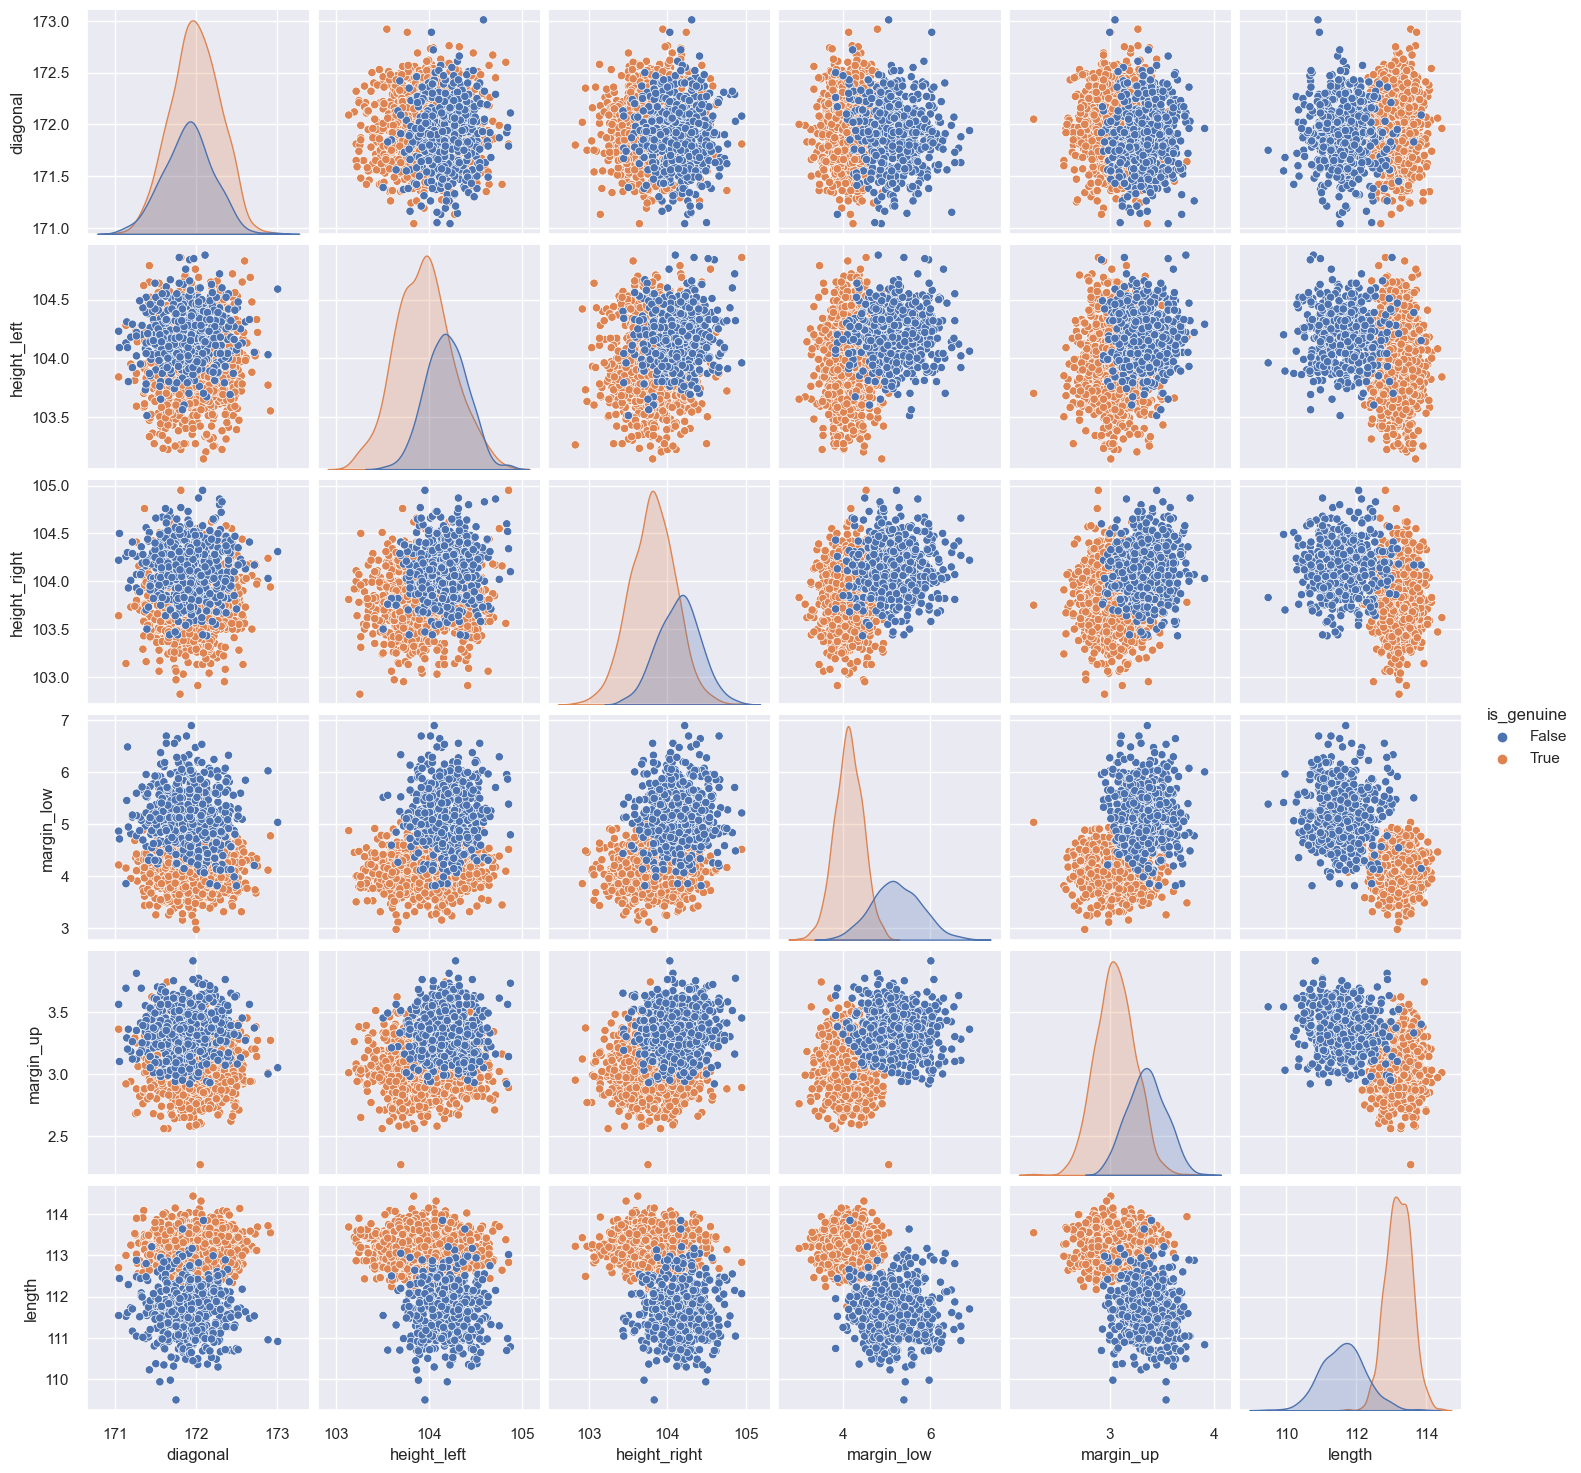

In [12]:
sns.pairplot(Df_Billet,hue='is_genuine')

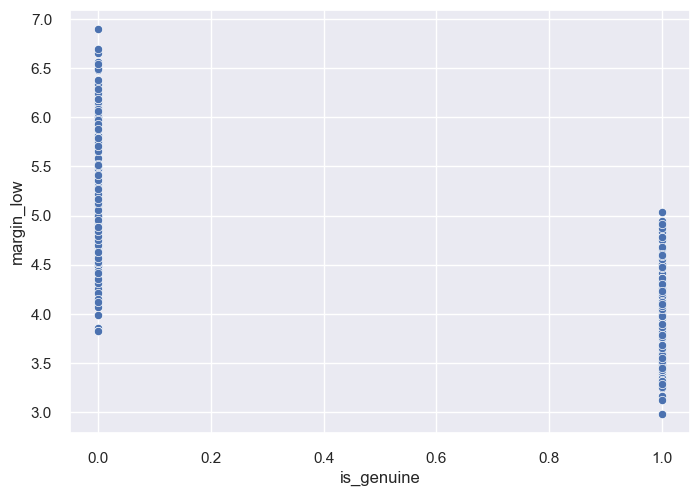

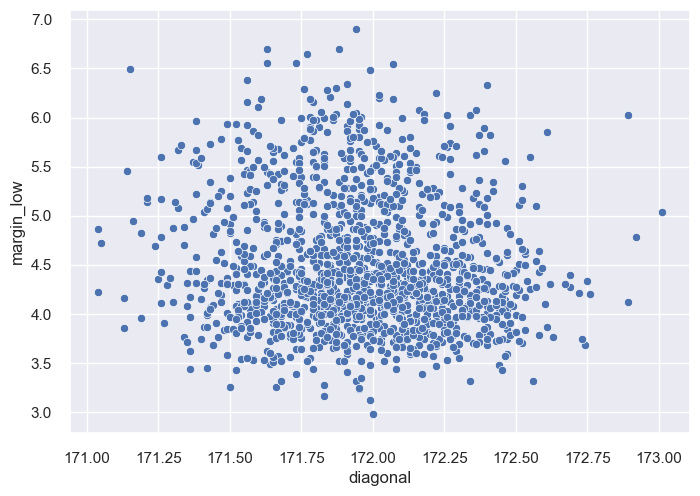

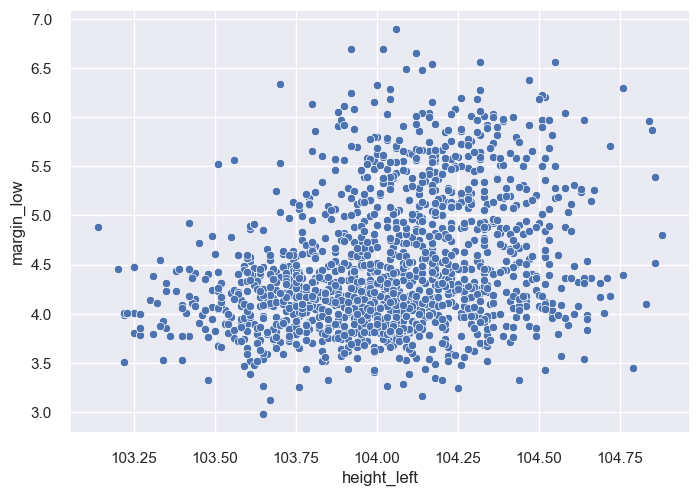

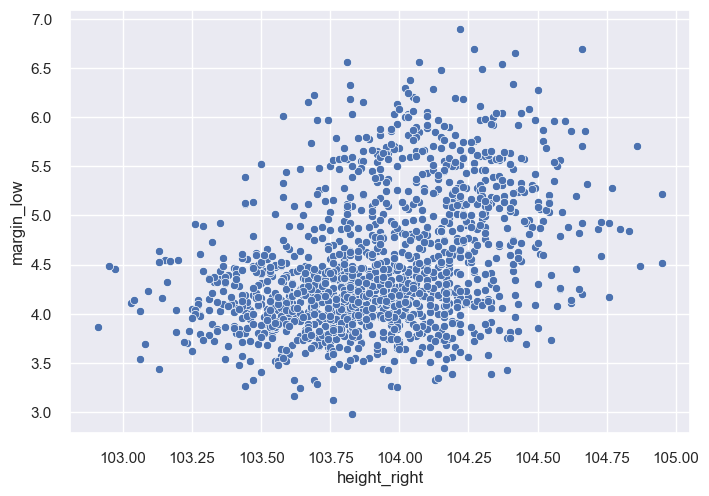

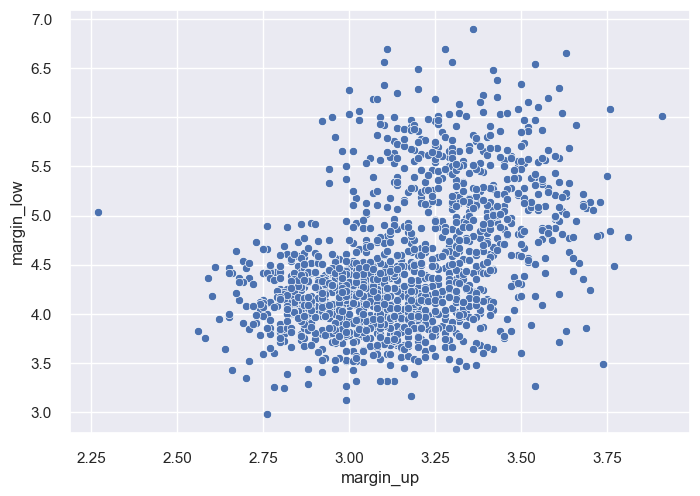

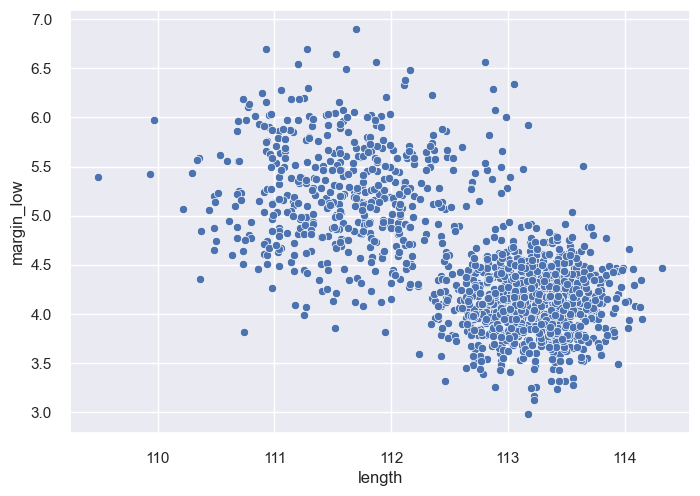

In [13]:
X = Df_Billet.drop("margin_low", axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=Df_Billet["margin_low"])
    plt.show()

Nous pouvons voir qu'il y'a certaines relations potentiellement linéaire comme avec margin_low et length ou encore margin_low avec margin_up

In [14]:
# vérification des corrélations entre nos variables 
Df_Billet.corr()

is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.132756    -0.379833     -0.485092   -0.783032   
diagonal        0.132756  1.000000     0.019472     -0.024492   -0.111534   
height_left    -0.379833  0.019472     1.000000      0.242279    0.302643   
height_right   -0.485092 -0.024492     0.242279      1.000000    0.391085   
margin_low     -0.783032 -0.111534     0.302643      0.391085    1.000000   
margin_up      -0.606262 -0.055649     0.246522      0.307005    0.431606   
length          0.849285  0.097587    -0.320863     -0.401751   -0.666753   

              margin_up    length  
is_genuine    -0.606262  0.849285  
diagonal      -0.055649  0.097587  
height_left    0.246522 -0.320863  
height_right   0.307005 -0.401751  
margin_low     0.431606 -0.666753  
margin_up      1.000000 -0.520575  
length        -0.520575  1.000000

<Axes: >

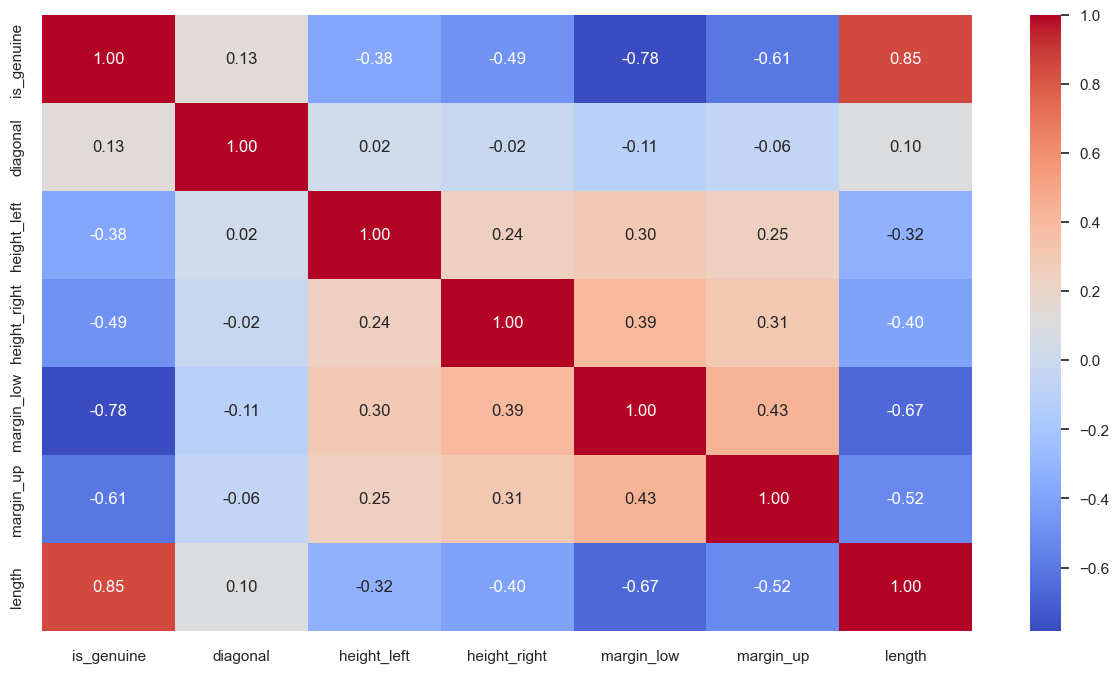

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(Df_Billet.corr(),annot=True,fmt=".2f",cmap="coolwarm")

On peut voir que notre colonne margin_low est fortement anticorélée à lenght mais aussi à Is_genuine et faiblement à diagonal,

En revanche elle est corrélée à Height_left,Height_right,margin_up

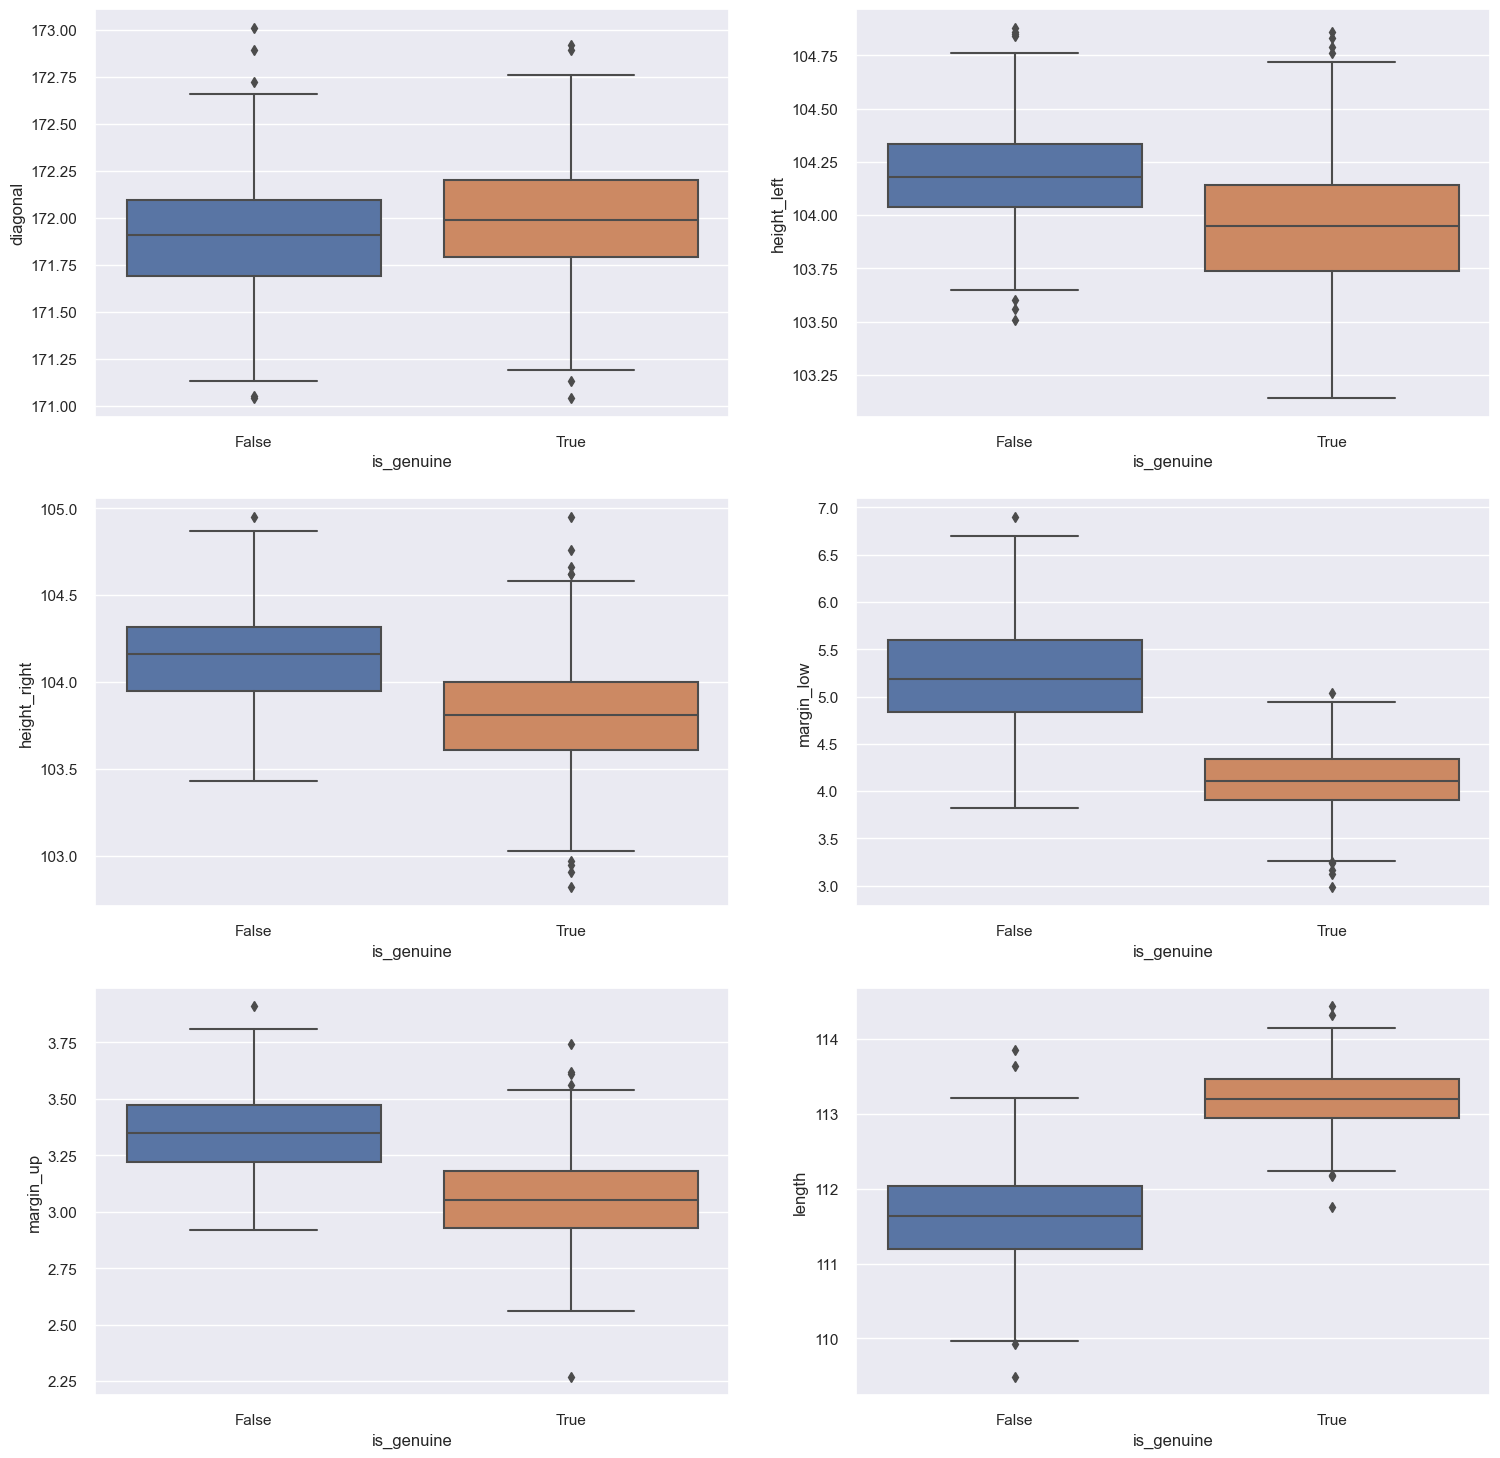

In [16]:
# nous allons maintenant étudier nos Billets en fonction de nos différentes variables 

fig, axes = plt.subplots(3, 2, figsize=(18,18))

for i in range(3):
    for j in range(2):
        sns.boxplot(ax=axes[i,j], 
                    data=Df_Billet, 
                    x='is_genuine', 
                    y=Df_Billet.columns[1:][2*i+j])


On remarque que nos faux billets ont des marges et des hauteurs plus importantes que les vrais billets. Les vrais billets semblent aussi plus long que les faux 

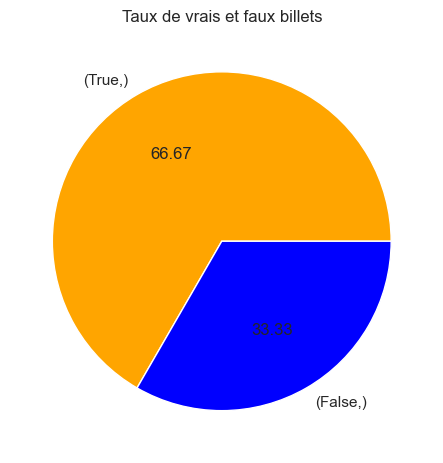

In [17]:
#Répartion des billets 
Df_Billet[['is_genuine']].value_counts().plot.pie(autopct='%.2f',colors=['orange','blue'])
plt.title('Taux de vrais et faux billets')
plt.show()

### Test de Normalité Shapiro-Wilk <a class="anchor" id="section_1_3"></a>

Les tests de normalité permettent de s'assurer que la distribution des variables est gaussienne ou non.

Avec un risque premier alpha de 5%, on émet les deux hypothèses suivantes:

H0:la variable suit une loi normale

H1:la variable ne suit pas une loi normale

In [18]:
# Nous allons d'abord crée une listes de nos variables

Df_Billet.columns.values.tolist()

['is_genuine',
 'diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [19]:
# Test de Shapiro-Wilk

alpha = 0.05

for i in Df_Billet.iloc[:,:]:
    stat, pvalue = stats.shapiro(Df_Billet[i])
    print("p_value: ", pvalue)
    if pvalue > alpha:
        print(i, ": Les données suivent une loi normale\n")
    else:
        print(i, ": Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale\n")

p_value:  0.0
is_genuine : Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale

p_value:  0.32343590259552
diagonal : Les données suivent une loi normale

p_value:  0.0509396530687809
height_left : Les données suivent une loi normale

p_value:  0.9806053638458252
height_right : Les données suivent une loi normale

p_value:  1.0
margin_low : Les données suivent une loi normale

p_value:  0.000810406228993088
margin_up : Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale

p_value:  7.863947037789753e-28
length : Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale



>    Les données Diagonal, height_left, height_right et margin_low suivent une loi normale en revanche les données  margin_up, length ne suivent pas une loi normale.

> Lorsque les résidus ne suivent pas une distribution normale, cela peut indiquer que le modèle de régression n'est pas adéquat pour capturer toutes les relations linéaires entre les variables. Il peut y avoir des formes de non-linéarité, des interactions non prises en compte ou d'autres problèmes qui affectent la validité des résultats de la régression.

### Test de Kolmogorov-Smirnov <a class="anchor" id="section_1_4"></a>

In [20]:
liste_var=Df_Billet_sans_nan.drop(columns=['margin_low','is_genuine'])
for var in liste_var :
    print(var,":",st.ks_2samp(Df_Billet[var],list(np.random.normal(np.mean(Df_Billet[var]), np.std(Df_Billet[var]), 1000))))
    
    if pvalue < alpha:
        print("Les données suivent une loi normale\n")
    else:
        print("Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale")

diagonal : KstestResult(statistic=0.022, pvalue=0.9291935778749545, statistic_location=171.7987861925462, statistic_sign=-1)
Les données suivent une loi normale

height_left : KstestResult(statistic=0.034, pvalue=0.48449676876654146, statistic_location=104.23, statistic_sign=1)
Les données suivent une loi normale

height_right : KstestResult(statistic=0.04833333333333333, pvalue=0.11847646549385638, statistic_location=103.7593770279764, statistic_sign=-1)
Les données suivent une loi normale

margin_up : KstestResult(statistic=0.052, pvalue=0.0760571141480627, statistic_location=3.12, statistic_sign=1)
Les données suivent une loi normale

length : KstestResult(statistic=0.16466666666666666, pvalue=1.193029633156432e-14, statistic_location=112.7976169521227, statistic_sign=-1)
Les données suivent une loi normale



Le Test non paramétrique de Kolgomorov-smirnov  nous montre que nous avons une distribution normale

## Chapitre II - Régression Linéaire <a class="anchor" id="chapter2"></a>

La régression linéaire est une technique d'analyse de données qui prédit la valeur de données inconnues en utilisant une autre valeur de données apparentée et connue. Elle modélise mathématiquement la variable inconnue ou dépendante et la variable connue ou indépendante sous forme d'équation linéaire de type y = a.x + b, où y est la variable à prédire et x est la/les variable(s) connue(s).

### Régression Linéaire Création <a class="anchor" id="section_2_1"></a>

Nous avons pu voir que dans notre dataset la variable margin_low est anticorrélée à lenght nous allons donc afficher cette relation


On Fractionne le dataset en 2 phases Train/Test

In [21]:
 # On fractionne le dataset en 80/20 pour avoir plus de donnée d'entraitenement que de test

train, test = train_test_split(Df_Billet_sans_nan, test_size=0.2, random_state=42)

In [22]:
train.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1170.000000  1170.000000   1170.000000  1170.000000  1170.000000   
mean    171.962906   104.036077    103.922222     4.484786     3.154085   
std       0.299311     0.300680      0.327694     0.667411     0.234868   
min     171.050000   103.140000    102.910000     2.980000     2.270000   
25%     171.752500   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.240000    104.150000     4.860000     3.310000   
max     172.890000   104.880000    104.950000     6.900000     3.910000   

            length  
count  1170.000000  
mean    112.674205  
std       0.875115  
min     109.970000  
25%     112.035000  
50%     112.950000  
75%     113.337500  
max     114.320000

<Axes: >

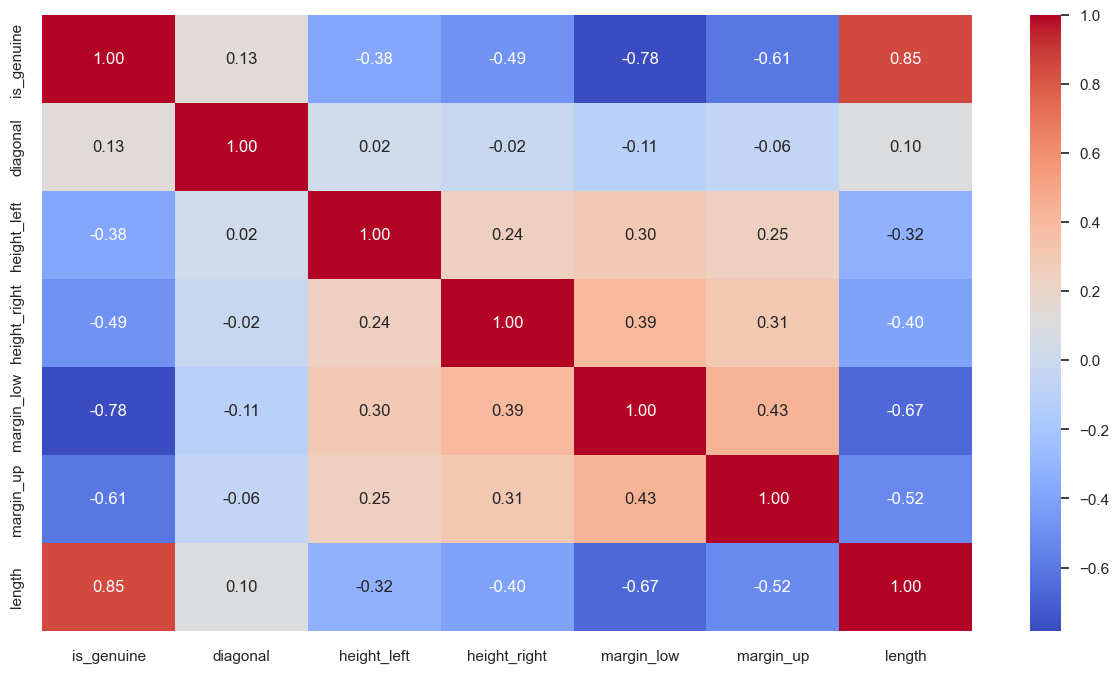

In [23]:
# Vérification du train set pour voir si il est conforme au set de départ 

plt.figure(figsize=(15,8))
sns.heatmap(Df_Billet.corr(),annot=True,fmt=".2f",cmap="coolwarm")

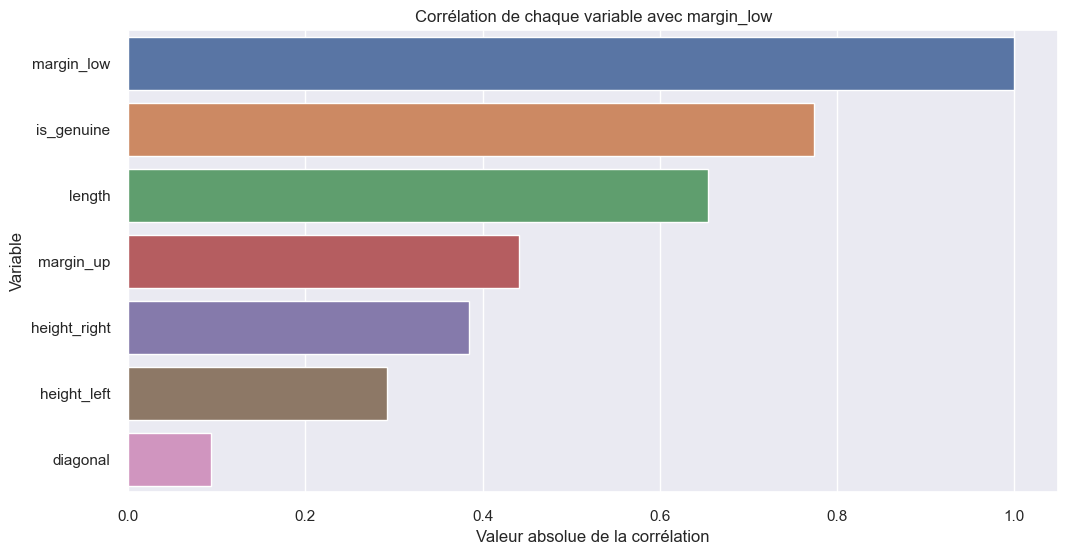

In [24]:
# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr()["margin_low"]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec margin_low")
plt.show()

### Création du modèle simple <a class="anchor" id="section_2_2"></a>

Forte corrélation de notre variable qualitative avec margin_low mais aussi forte corélation avec length

In [25]:
# Analyse avec Statmodel

reg_simp = smf.ols('margin_low ~ length', data=Df_Billet_sans_nan).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          8.98e-189
Time:                        02:42:02   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5960      1.670     36.881      0.0

Nous obtenons des statistiques sur les coefficients obtenus : leur valeur, leur écart-type, la statistique de test de Student, et la p-valeur, ainsi que des statistiques sur le modèle général (R², AIC, BIC,etc...).

Ici, on voit que la variable length est significative car la P-value < 0,05.

Intercept correspond à la valeur de y lorsque X est égal à zéro. C'est le b dans l'équation de regression y = a.x + b

Quant au R², il est de l'ordre de 0.445. Ce n'est pas très élevé, mais ceci est logique au vu de la dispersion du nuage de points originel et du manque de variable explicative.

In [26]:
# Stockage ddes noms de nos variables explicatives 
list_var=Df_Billet_sans_nan.drop(columns=['margin_low','is_genuine'])

In [27]:
# Séparation des variables prédictives et de la variable cible

X_train = pd.DataFrame(train['length'])
y_train = train["margin_low"]


X_test = pd.DataFrame(test['length'])
y_test = test["margin_low"]


In [28]:
 # On fractionne le dataset en 80/20 pour avoir plus de donnée d'entraitenement que de test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1170, 1)
(293, 1)
(1170,)
(293,)


In [29]:
# Création du modèle de régrassion linéraire avec Sklearn

regLin=LinearRegression() # Création de l'objet regression lineaire

In [30]:
# Entraînement des données

regLin.fit(X_train,y_train)

LinearRegression()

In [31]:
# Prédiction
y_pred=regLin.predict(X_test)
y_pred[:10]

array([4.98085775, 4.09270387, 4.31723716, 4.1326209 , 4.03282833,
       4.14758979, 4.88106518, 4.11765202, 4.06775573, 4.01286982])

A présent que notre modèle est mis en place nous allons le tester 

###  Test du modèle <a class="anchor" id="section_2_3"></a>

Nous avons puvoir que la relation entre margin_low et lenght était la plus ressemblante à une régression linéaire de plus la corrélation entre ces deux variables est fortes 

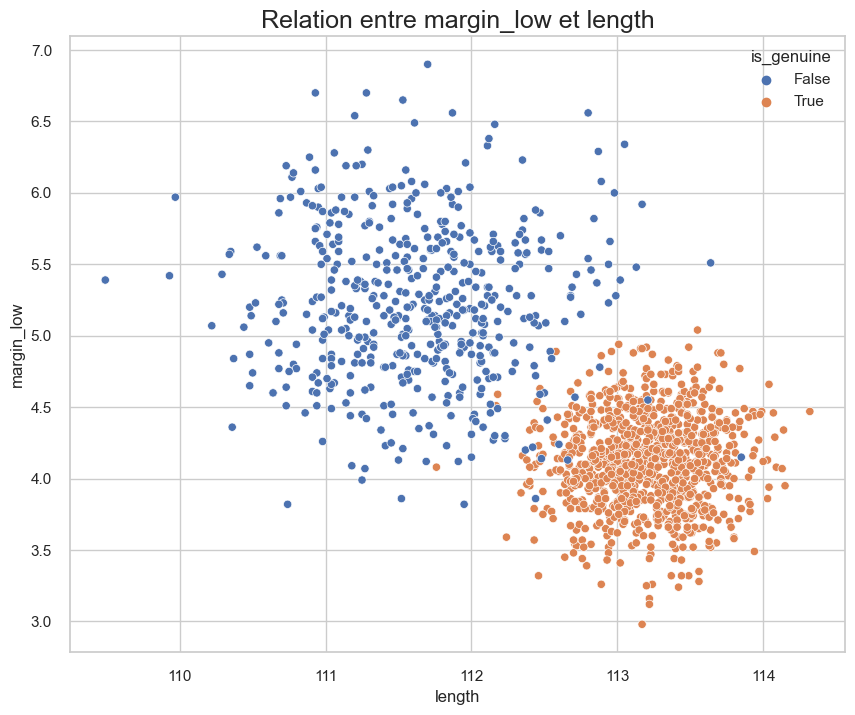

In [32]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.title('Relation entre margin_low et length', fontsize=18)
sns.scatterplot(data =Df_Billet_sans_nan, x = 'length', y = 'margin_low', hue = 'is_genuine')
plt.xlabel('length')
plt.ylabel('margin_low')
plt.show()

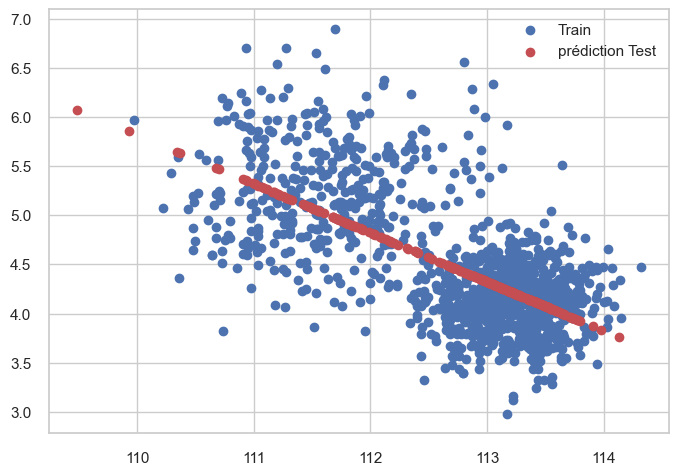

In [33]:
plt.scatter(X_train.length,y_train,label='Train')
plt.scatter(X_test.length,y_pred,c='r',label='prédiction Test')
plt.legend()
plt.show()

### Vérification des erreurs et Coeff de Détermination <a class="anchor" id="section_2_4"></a>

In [34]:
# Nous allons pouvoir à présent vérifier le score de notre modèle 

train_score = regLin.score(X_train, y_train)
test_score = regLin.score(X_test, y_test)

print('Score train :', train_score,'et Score test R²:', test_score)

Score train : 0.4280347779842749 et Score test R²: 0.5136070700267961


Le R² ou coefficient de détermination est équivalent au score test.

Il mesure de la qualité de prédiction d’une régression linéaire et en cela va faciliter la comparaison entre différents modèles de régression linéaire.

Le R² correspond à l'évaluation de la performance du modèle par rapport à un niveau de variation présent dans les données  et vaut au maximum 1, lorsque toutes les prédictions sont exactes. Il n’y a pas de score minimum, mais un modèle simple prédisant tout le temps la valeur moyenne atteint un score R² de 0. Par conséquent un score R2 négatif signifie que les prédictions sont moins bonnes que si l’on prédisait systématiquement la valeur moyenne.

Graphiquement, plus le coefficient de détermination se rapproche de 0, plus le nuage de points se disperse autour de la droite de régression.

Au contraire, plus le R² tend vers 1, plus le nuage de points se resserre autour de la droite de régression. Quand les points sont exactement alignés sur la droite de régression, alors R² = 1.

In [35]:
# Calculons le coeeficient R² de notre régression linéaire simple

R2_RLS = r2_score(y_test, y_pred)
R2_RLS

0.5136070700267961

In [36]:

MAE_RLS= mean_absolute_error(y_test,y_pred)

print('MAE =', mean_absolute_error(y_test,y_pred)) # Erreur quadratique moyenne

MAE = 0.3443311889531179


In [37]:
MSE_RLS = mean_squared_error(y_test,y_pred)

print('MSE =', mean_squared_error(y_test,y_pred)) # Erreur absolue moyenne

MSE = 0.20501721543154086


In [38]:
RMSE_RLS = np.sqrt(mean_squared_error(y_test,y_pred))

print('RMSE =',np.sqrt(mean_squared_error(y_test,y_pred))) # Racine carrée de l'erreur quadratique 


RMSE = 0.4527882677715279


In [39]:
Median_Absolute_Error_S = median_absolute_error(y_test,y_pred)
print('Median Absolute Error =',median_absolute_error(y_test,y_pred)) # Erreur médiane absolue qui retourne la médiane de toute nos erreurs

Median Absolute Error = 0.2628698179423381


Le R² est faible il n'est que de 51 %, il en va de même avec le RMSE mais aussi pour la Médian Absolute error 

Le but ici est de calculer les erreurs y en fonction des prédictions y_pred est donc permettre d'évaluer la performance de notre modèle 

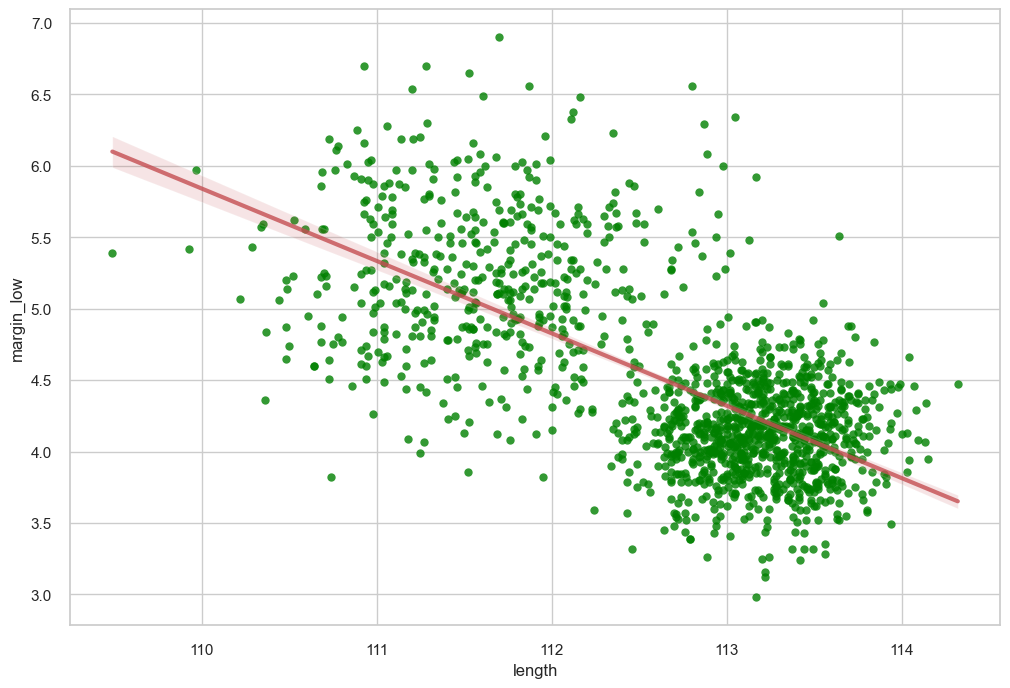

In [40]:
# création de la droite de régression 

fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.set(style="darkgrid")

ax.set_xlabel("length")
ax.set_ylabel("margin_low")

sns.regplot(data = Df_Billet_sans_nan, x = 'length', y = 'margin_low',  color='green', line_kws={"color":"r","alpha":0.8,"lw":3})

plt.show()

Nous pouvons à présent tester nos résidus

### Normalité des Résidus et Homoscédacité <a class="anchor" id="section_2_4"></a>

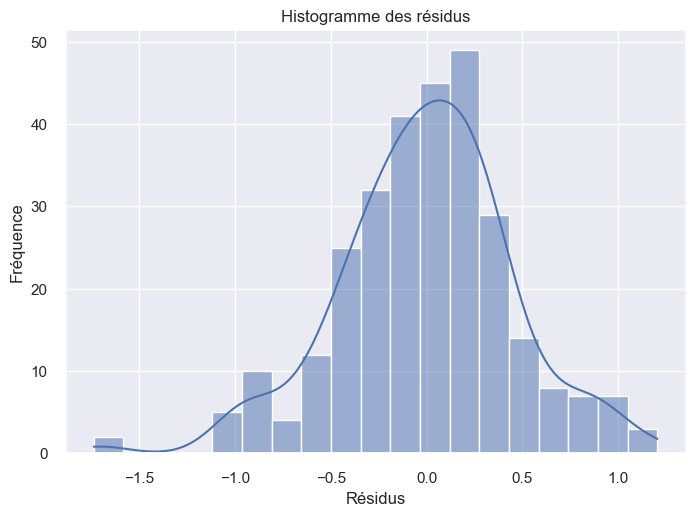

p-value du test de normalité : 0.0026656677946448326


In [41]:
# Test d'homoscédasticité
résiduals= y_pred-y_test

sns.histplot(résiduals, bins='auto',kde=True)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Histogramme des résidus')
plt.show()

_, p_value = stats.shapiro(résiduals)
print(f"p-value du test de normalité : {p_value}")

Ici la p-valeur du test de normalité de Shapiro-Wilk est très faible ce qui indique que les résidus ne suivent pas une distribution normale. L'histogramme des résidus le confirme également.

Lorsque les résidus ne suivent pas une distribution normale, cela peut indiquer que le modèle de régression n'est pas adéquat pour capturer toutes les relations linéaires entre les variables. Il peut y avoir des formes de non-linéarité, des interactions non prises en compte ou d'autres problèmes qui affectent la validité des résultats de la régression.

In [42]:
billet_test=pd.concat([y_test,X_test])

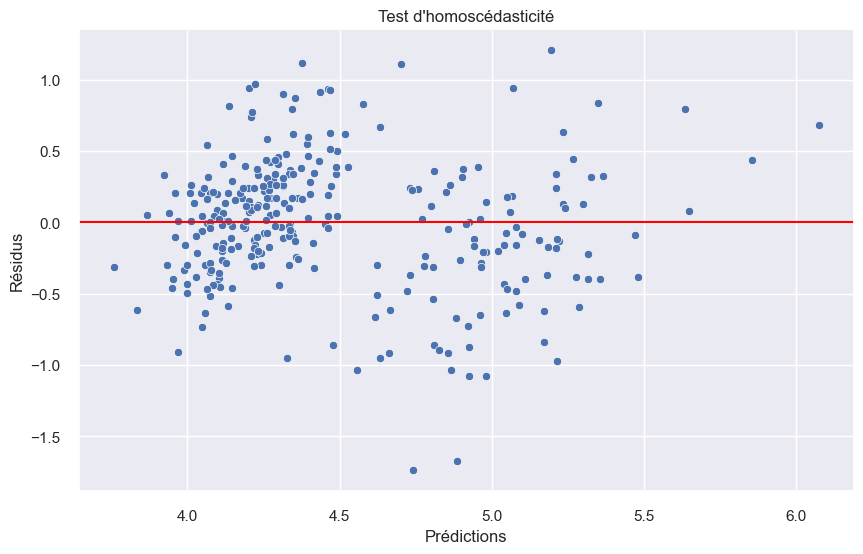

In [43]:
# Test d'homoscédasticité
y_train = y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(y=résiduals, x=y_train)

plt.axhline(y=0, color='red')
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

On appelle homoscédasticité l'égalité de la variance d'une variable quelque soit l'échantillon qui y est puisé, on a alors une homogénéïté sur notre nuage. Lorsque la variance diffère selon les échantillons, on parle alors d'hétéroscédasticité.

L'homoscédasticité peut être vérifiée avec le test de Levene (non sensible à la non-normalité - à privilégier)

In [44]:
levene_test = levene( X_train['length'], y_train, center='median')

print(f"Statistic: {levene_test.statistic}")
print(f"p-value: {levene_test.pvalue}")

Statistic: 89.78437862088583
p-value: 1.0296389140759977e-20


La valeur p du test de Levene est inférieure à 0,05 alors il existe une différence significative entre les variances. donc présence d'hétérodascité

### Régression Linéaire multiple <a class="anchor" id="section_2_5"></a>

La regression linéaire multiple est la même chose que la régression linéaire simple si ce n'est qu'au lieu d'utiliser une variable quantitative X indépendante pour prédire les valeurs y de notre variable, elle va utiliser une combinaison de plusieurs variables quantitatives X, toutes associées à un coefficient qui va correspondre à l'impact de la variable X sur y (à sa contribution dans le modèle). Plus le coefficient s'éloigne de zéro et plus la contribution de la variable est importante).

In [45]:
# Création régression linéaire multiple avec stats model 

regre=smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length',  data=Df_Billet_sans_nan).fit()
print(regre.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          2.60e-202
Time:                        02:42:04   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Le R²
 vaut environ 0.477, et le 
 ajusté est d'environ 0.476.

Cette valeur est très légeremment plus élevée qu'en régression linéaire simple (où nous avions 0.444), et c'est logique, car lorsque l'on rajoute des variables explicatives potentielles, on accroît naturellement la valeur de R²
.

In [46]:
# Régression Linéaire miltiple avec sklearn

X2 = Df_Billet_sans_nan.drop(columns = ['margin_low','is_genuine'])
y2 = Df_Billet_sans_nan.margin_low

In [47]:
X2.head()

diagonal  height_left  height_right  margin_up  length
0    171.81       104.86        104.95       2.89  112.83
1    171.46       103.36        103.66       2.99  113.09
2    172.69       104.48        103.50       2.94  113.16
3    171.36       103.91        103.94       3.01  113.51
4    171.73       104.28        103.46       3.48  112.54

In [48]:
y2.head()

0    4.52
1    3.77
2    4.40
3    3.62
4    4.04
Name: margin_low, dtype: float64

In [49]:
# On sépare une niouvelle fois notre set en 80/20

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [50]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1170, 5)
(293, 5)
(1170,)
(293,)


In [51]:
reg_multi=LinearRegression()

In [52]:
reg_multi.fit(X_train2,y_train2)

LinearRegression()

In [53]:
# Prédiction
y_pred2=reg_multi.predict(X_test2)
y_pred2[:10]

array([4.95663909, 4.29838247, 4.37773033, 4.09528905, 4.02274623,
       4.09556812, 4.85333759, 4.12787564, 4.20096875, 3.86186446])

### Vérification des erreurs et Coeff de Détermination <a class="anchor" id="section_2_6"></a>

In [54]:
train_score2 = reg_multi.score(X_train2, y_train2)
test_score2 = reg_multi.score(X_test2, y_test2)

print('Score train :', train_score2,'Score test  :', test_score2 )

Score train : 0.4604807117736819 Score test  : 0.5457956683532407


In [55]:
# Calculons le coeeficient R² de notre régression linéaire multiple

R2_RLM = r2_score(y_test2, y_pred2)
R2_RLM

0.5457956683532407

In [56]:
# Utilisation du coefficient de détermination

MAE_RLM = mean_absolute_error(y_test2,y_pred2)
print('MAE =', mean_absolute_error(y_test2,y_pred2)) # Erreur quadratique moyenne

MAE = 0.3353706932764837


In [57]:
MSE_RLM = mean_squared_error(y_test2,y_pred2)

print('MSE =', mean_squared_error(y_test2,y_pred2)) # Erreur absolue moyenne

MSE = 0.19144954947493334


In [58]:
RMSE_RLM = np.sqrt(mean_squared_error(y_test2,y_pred2))
                   
print('RMSE =',np.sqrt(mean_squared_error(y_test2,y_pred2))) # Racine carrée de l'erreur quadratique 

RMSE = 0.4375494823159243


In [59]:
Median_Absolute_Error_M= median_absolute_error(y_test2,y_pred2)
print('Median Absolute Error =',median_absolute_error(y_test2,y_pred2))# Erreur médiane absolue qui retourne la médiane de toute nos erreurs

Median Absolute Error = 0.2623802208694581


Le R² est à 54% ce qui reste bas mais plus interessant que ce que nous avons sur notre modèle linéaire simple car plus de variables explicatives.

### Normalité des Résidus, Homoscédacité, QQ-plot <a class="anchor" id="section_2_7"></a>

#### Normalité des Résidus

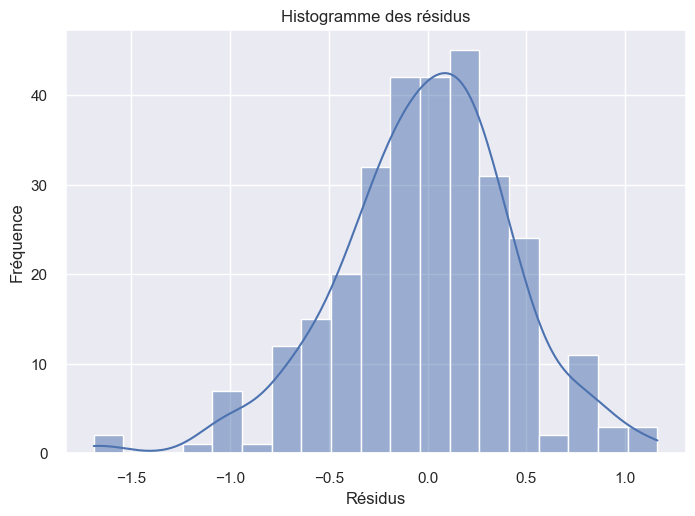

p-value du test de normalité : 0.0038981903344392776


In [60]:
# Test d'homoscédasticité
résiduals2= y_pred2-y_test2

sns.histplot(résiduals2, bins='auto',kde=True)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Histogramme des résidus')
plt.show()

_, p_value = stats.shapiro(résiduals2)
print(f"p-value du test de normalité : {p_value}")

P-value < 0,05

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.

#### homoscédasticité

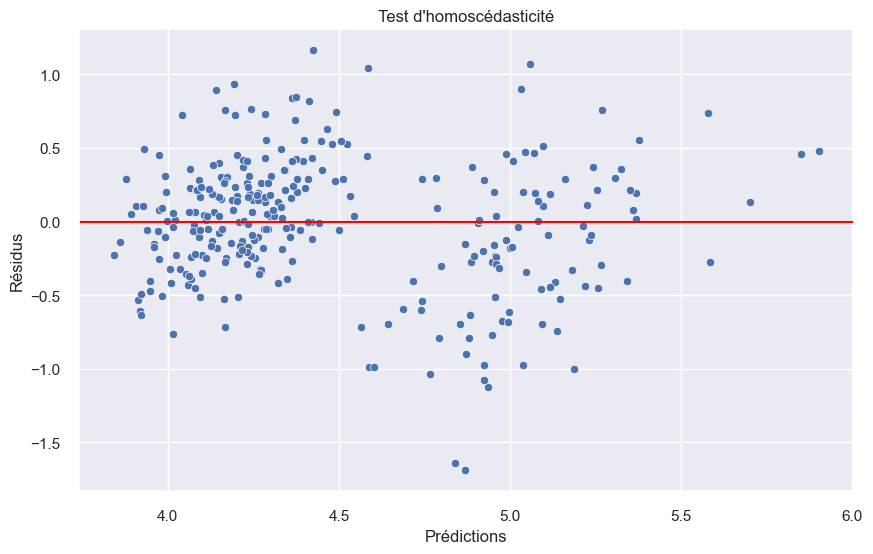

In [61]:

plt.figure(figsize=(10, 6))
sns.scatterplot(y=résiduals2, x=y_pred2)

plt.axhline(y=0, color='red')
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

In [62]:
levene_test = levene(résiduals2,y_train2,center='median')

print(f"Statistic: {levene_test.statistic}")
print(f"p-value: {levene_test.pvalue}")

Statistic: 38.013602523442486
p-value: 9.072813914534566e-10


Si la valeur p du test de Levene est supérieure à 0,05, alors les variances ne sont pas significativement différentes les unes des autres, P>0,05

In [63]:
__, pval, __, f_pval = sms.het_breuschpagan(regre.resid, regre.model.exog)
print('Reg_Multi p value test Breusch-Pagan:', pval)

Reg_Multi p value test Breusch-Pagan: 7.759535216194938e-16


#### QQ-plot

    On appelle QQ-Plot normal le diagramme qui permet de comparer la distribution des données d’un lot à la distribution dite normale ou gaussienne. 

<Figure size 800x550 with 0 Axes>

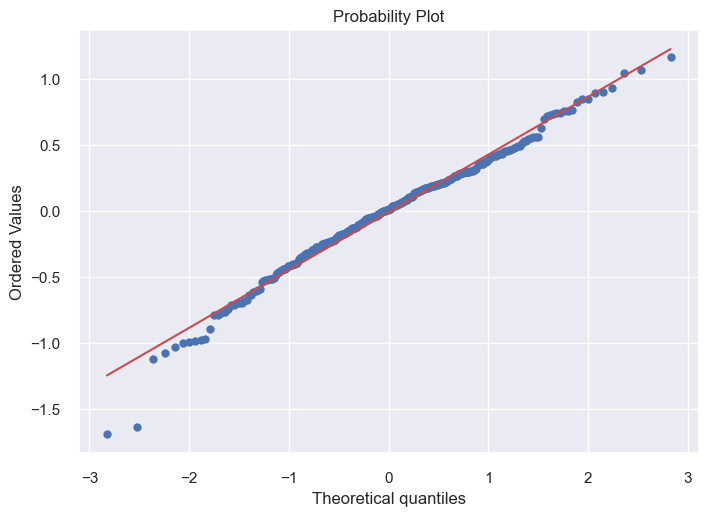

<Figure size 800x550 with 0 Axes>

In [64]:
# Représentation de quantile à quantile 

stats.probplot(résiduals2,plot=plt,dist='norm',)
plt.figure()

In [65]:
st.shapiro(résiduals2)

ShapiroResult(statistic=0.985090970993042, pvalue=0.0038981903344392776)

Donc H0 rejetée
Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante permettent de dire que les résultats obtenus ne sont pas absurdes.

### Vérification des colinéaritées ou VIF <a class="anchor" id="section_2_8"></a>

In [66]:

variables = regre.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0136128990686315,
 1.1382605736082538,
 1.2301145155560338,
 1.404403778184362,
 1.5769501453665806]

La multicolinéarité se produit lorsqu’il existe deux ou plusieurs variables indépendantes dans un modèle de régression multiple, qui ont une forte corrélation entre elles. Lorsque certaines caractéristiques sont fortement corrélées, nous pouvons avoir des difficultés à distinguer leurs effets individuels sur la variable dépendante. La multicolinéarité peut être détectée à l’aide de diverses techniques, l’une de ces techniques étant le facteur d’inflation de la variance ( VIF ).


VIF commence à 1 et n'a pas de limite supérieure

VIF = 1, pas de corrélation entre la variable indépendante et les autres variables

VIF supérieur à 5 ou 10 indique une forte multicolinéarité entre cette variable indépendante et les autres

Ici nous avons des valeurs qui sont inférieur à 10 

###  Analyse de nos 2 modèles et Choix du modèle <a class="anchor" id="section_2_9"></a>

In [67]:
# Nous allons comparer nos modèles afin de savoir qu'elle serait le modèle de prédiction le plus efficient 

cols=['Régression Linéaire Simple','Régression Linéaire Multiple']
index=['R²','MAE','MSE','RMSE','Median Absolute Error']

Analyse_Modèle= pd.DataFrame(index=index, columns=cols)

Analyse_Modèle['Régression Linéaire Simple'] = [R2_RLS, MAE_RLS,MSE_RLS,RMSE_RLS,Median_Absolute_Error_S]
Analyse_Modèle['Régression Linéaire Multiple'] = [R2_RLM, MAE_RLM,MSE_RLM,RMSE_RLM,Median_Absolute_Error_M]

Analyse_Modèle

Régression Linéaire Simple  \
R²                                       0.513607   
MAE                                      0.344331   
MSE                                      0.205017   
RMSE                                     0.452788   
Median Absolute Error                    0.262870   

                       Régression Linéaire Multiple  
R²                                         0.545796  
MAE                                        0.335371  
MSE                                        0.191450  
RMSE                                       0.437549  
Median Absolute Error                      0.262380

Les résultats restent mitigés entre nos deux méthodes mais le R² de la Régréssion Linéaire Multiple est plus intéressant et s'explique par son nombre de variable explicative.

De plus les différents test que nous avons pu effectuer sur les résidus, la distribution et l'homscédacité nous suggère que le modèle de régression Linéaire multiple est le plus favorable.

## Implémentation des valeurs manquantes <a class="anchor" id="section_2_10"></a>

In [68]:
# Nous allons à présents remplacer nos Nan par la prédiction de notre modèle de régression linéaire Multiple

Df_Billet_bis=Df_Billet.loc[Df_Billet['margin_low'].isna(),:]

Df_Billet_bis.head(5)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   
197        True    171.45       103.66        103.80         NaN       3.62   
241        True    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [69]:
# Nous allons ensuite isoler 'is_genuine'

is_genuine=Df_Billet_bis.is_genuine.values
is_genuine

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False])

In [70]:
# Nous allons ensuite supprimer les colonnes que nous remplacerons par la suite

Df_Billet_bis=Df_Billet_bis.drop(columns=['margin_low','is_genuine'])
Df_Billet_bis.head(5)

diagonal  height_left  height_right  margin_up  length
72     171.94       103.89        103.45       3.25  112.79
99     171.93       104.07        104.18       3.14  113.08
151    172.07       103.80        104.38       3.02  112.93
197    171.45       103.66        103.80       3.62  113.27
241    171.83       104.14        104.06       3.02  112.36

In [71]:
Df_Billet_bis.shape

(37, 5)

Nous avons bien nos 37 lignes ou nous pouvions voir les Nan

In [72]:
# Nous transposons notre modèle de régression linéaire sur notre dataset

Df_Billet_bis['margin_low']=reg_multi.predict(Df_Billet_bis)
Df_Billet_bis.head(5)

diagonal  height_left  height_right  margin_up  length  margin_low
72     171.94       103.89        103.45       3.25  112.79    4.323133
99     171.93       104.07        104.18       3.14  113.08    4.393907
151    172.07       103.80        104.38       3.02  112.93    4.416845
197    171.45       103.66        103.80       3.62  113.27    4.337374
241    171.83       104.14        104.06       3.02  112.36    4.634614

In [73]:
# On rajoute la colonne manquante

Df_Billet_bis['is_genuine']=is_genuine

In [74]:
# On concatène maintenant notre fichier sans nan et le fichier de prédiction

Df_Billet=pd.concat([Df_Billet_sans_nan,Df_Billet_bis])
Df_Billet.head(10)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   
5        True    172.17       103.74        104.08        4.42       2.95   
6        True    172.34       104.18        103.85        4.58       3.26   
7        True    171.88       103.76        104.08        3.98       2.92   
8        True    172.47       103.92        103.67        4.00       3.25   
9        True    172.47       104.07        104.02        4.04       3.25   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  
5  112.81  
6  112.81  
7  113.08  
8  112.85  
9  113.45

In [75]:
# Vérification des Nan  

Df_Billet.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [76]:
Df_Billet.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.483432     3.151473   
std       0.305195     0.299462      0.325627     0.659489     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

# Analyse en Composante Principale ou ACP <a class="anchor" id="chapter3"></a>

Maintenant que nous n'avons plus de NAN, nous allons à présent vérifier l'implication mais aussi la variabilité de nos différente données 

In [77]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 10))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    
    # Titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

## Création Matrice de donnée <a class="anchor" id="section_3_1"></a>

In [78]:
# Pour la suite, je remplace les valeur True et False de la variable 'is_genuine' par des 1 et des 0 pour avoir une variable numérique
Df_Billet2=Df_Billet.copy()

Df_Billet2['is_genuine'] = Df_Billet2['is_genuine'].replace([True,False],[1,0])
Df_Billet2.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [79]:
X=Df_Billet2.values
X[:5]

array([[  1.  , 171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [  1.  , 171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [  1.  , 172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [  1.  , 171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [  1.  , 171.73, 104.28, 103.46,   4.04,   3.48, 112.54]])

In [80]:
type(X)

numpy.ndarray

In [81]:
X.shape

(1500, 7)

In [82]:
# On enregistre le nom de nos colonnes et de nos variables 
names=Df_Billet2.index
features=Df_Billet2.columns

In [83]:
# On va entraîner et transformer nos données afin d'avoir une moyenne à 0 et une STD à 1

Scaler=StandardScaler()

In [84]:
X_Scaled=Scaler.fit_transform(X)

In [85]:
# On vérifie que Moyennes= 0 et STD=1
idx=["mean","std"]
# Création Dataframe de IDX
pd.DataFrame(X_Scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6
mean  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Calcul en Composante Principal <a class="anchor" id="section_3_2"></a>

In [86]:
# Nous allons travailler sur 7 composantes 

n_components= 7

In [87]:
pca=PCA(n_components=n_components)

In [88]:
pca.fit(X_Scaled)

PCA(n_components=7)

In [89]:
# Recherche de la variance captée par chaque nouvelle composante. 
pca.explained_variance_ratio_

array([0.49247095, 0.14570397, 0.11277902, 0.10227683, 0.08448045,
       0.04623784, 0.01605093])

In [90]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([49.25, 14.57, 11.28, 10.23,  8.45,  4.62,  1.61])

In [91]:
# On fait le cumul de nos variance pour sa voir de combien de plan factoriel nous aruons besoin
scree_cum = scree.cumsum().round()
scree_cum

array([ 49.,  64.,  75.,  85.,  94.,  98., 100.])

In [92]:
# Création de liste des composantes 
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

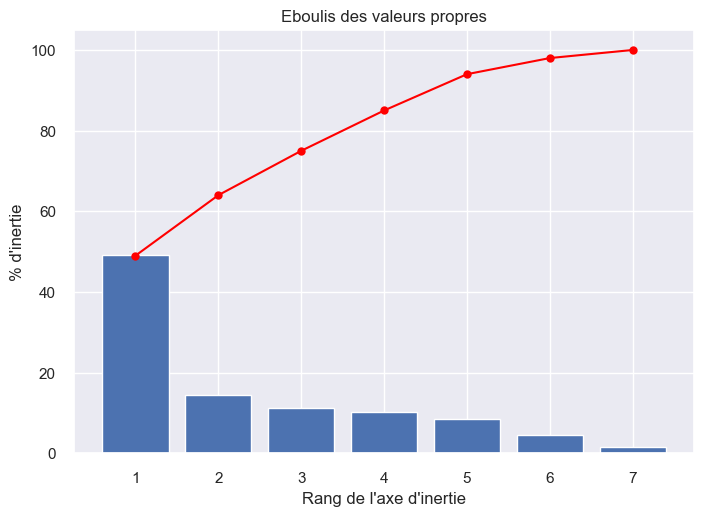

In [93]:
#Affichage Graphique nos composantes à travers un Eboulis 

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')

plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("% d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [94]:
# Nous allons donc réduire le nombre de nos composantes à 80% de la variance cumulée c'est à dire à 5 composantes
n_components= 5
pca=PCA(n_components=n_components)

In [95]:
# On fit nos données 
pca.fit(X_Scaled)

PCA(n_components=5)

In [96]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5]

In [97]:
# Calcul de nos composantes & affichage :
pcs = pca.components_
pcs

array([[-0.50829559, -0.07610423,  0.26601277,  0.32372718,  0.44690117,
         0.37426978, -0.46955631],
       [ 0.04484396,  0.92924504,  0.33442059,  0.13338262, -0.05829327,
         0.01201884,  0.03636032],
       [ 0.09630705, -0.32774256,  0.89194381, -0.04507255, -0.09690898,
        -0.23700964,  0.14194911],
       [ 0.08589791, -0.09809603, -0.11933749,  0.91129912, -0.07282483,
        -0.33286533,  0.14895778],
       [-0.14406151,  0.11281492, -0.07749825, -0.20107785,  0.46927086,
        -0.80213045, -0.23759715]])

In [98]:
#Création d'un Dataframe 
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6
0 -0.508296 -0.076104  0.266013  0.323727  0.446901  0.374270 -0.469556
1  0.044844  0.929245  0.334421  0.133383 -0.058293  0.012019  0.036360
2  0.096307 -0.327743  0.891944 -0.045073 -0.096909 -0.237010  0.141949
3  0.085898 -0.098096 -0.119337  0.911299 -0.072825 -0.332865  0.148958
4 -0.144062  0.112815 -0.077498 -0.201078  0.469271 -0.802130 -0.237597

In [99]:
# Relecture
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
F1       -0.51     -0.08         0.27          0.32        0.45       0.37   
F2        0.04      0.93         0.33          0.13       -0.06       0.01   
F3        0.10     -0.33         0.89         -0.05       -0.10      -0.24   
F4        0.09     -0.10        -0.12          0.91       -0.07      -0.33   
F5       -0.14      0.11        -0.08         -0.20        0.47      -0.80   

    length  
F1   -0.47  
F2    0.04  
F3    0.14  
F4    0.15  
F5   -0.24

In [100]:
# Affichage de nos composantes
pcs.T

F1        F2        F3        F4        F5
is_genuine   -0.508296  0.044844  0.096307  0.085898 -0.144062
diagonal     -0.076104  0.929245 -0.327743 -0.098096  0.112815
height_left   0.266013  0.334421  0.891944 -0.119337 -0.077498
height_right  0.323727  0.133383 -0.045073  0.911299 -0.201078
margin_low    0.446901 -0.058293 -0.096909 -0.072825  0.469271
margin_up     0.374270  0.012019 -0.237010 -0.332865 -0.802130
length       -0.469556  0.036360  0.141949  0.148958 -0.237597

<Axes: >

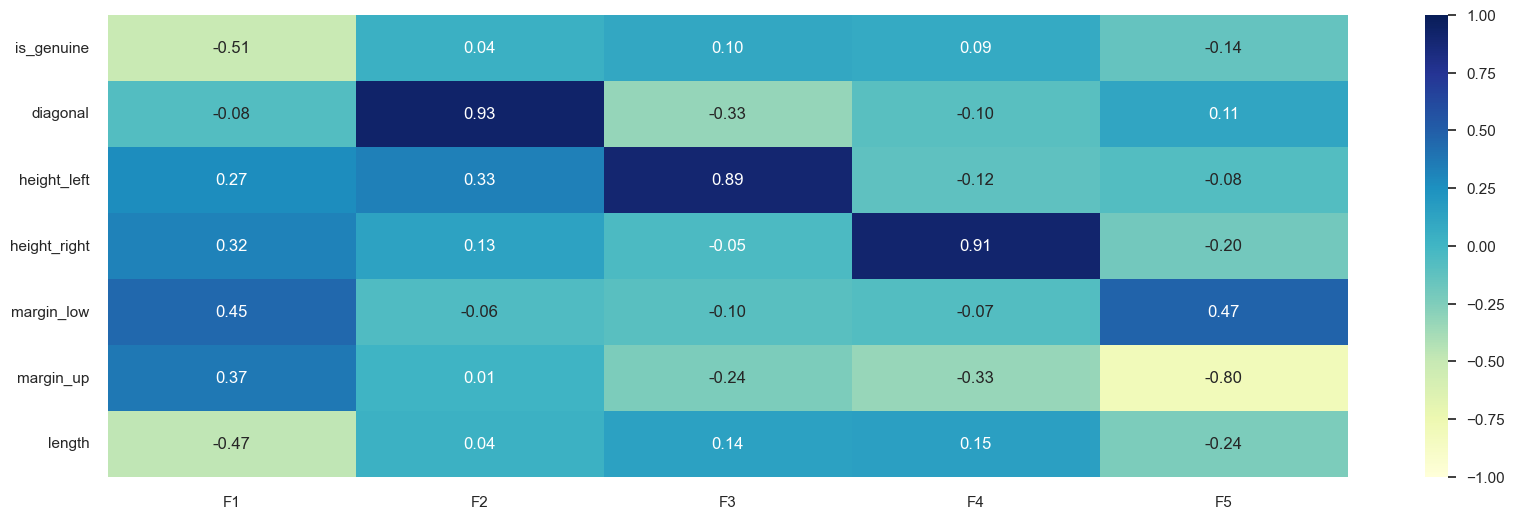

In [101]:
# Création de la heatmap pour voir la corrélation
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", fmt="0.2f")

## Graphique: Cercle des Corrélations <a class="anchor" id="section_3_3"></a>

In [102]:
# On définit nos fonctions
x_y = (0,1)
x_y

(0, 1)

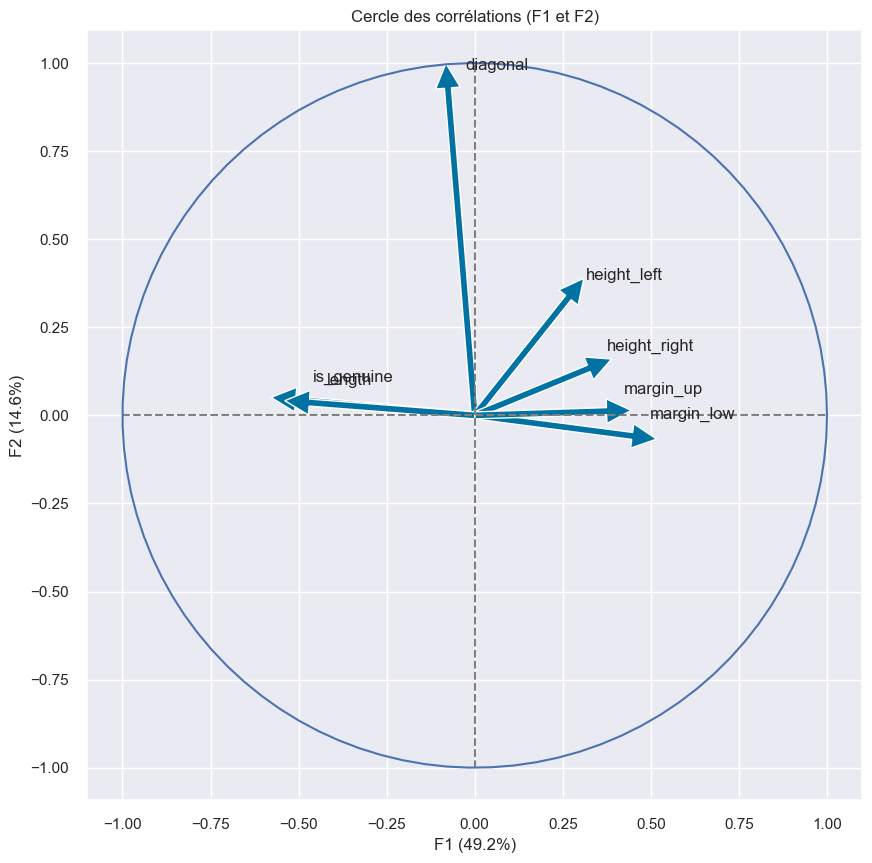

In [103]:
correlation_graph(pca, x_y, features)

Nous pouvons voir que le 1er cercle des corrélations expliqe à lui seul 64 % de la variance, avec une forte corrélation de margin_up ,margin_low, length et is_genuine (anticorélée) à F1 et de diagonal à F2 

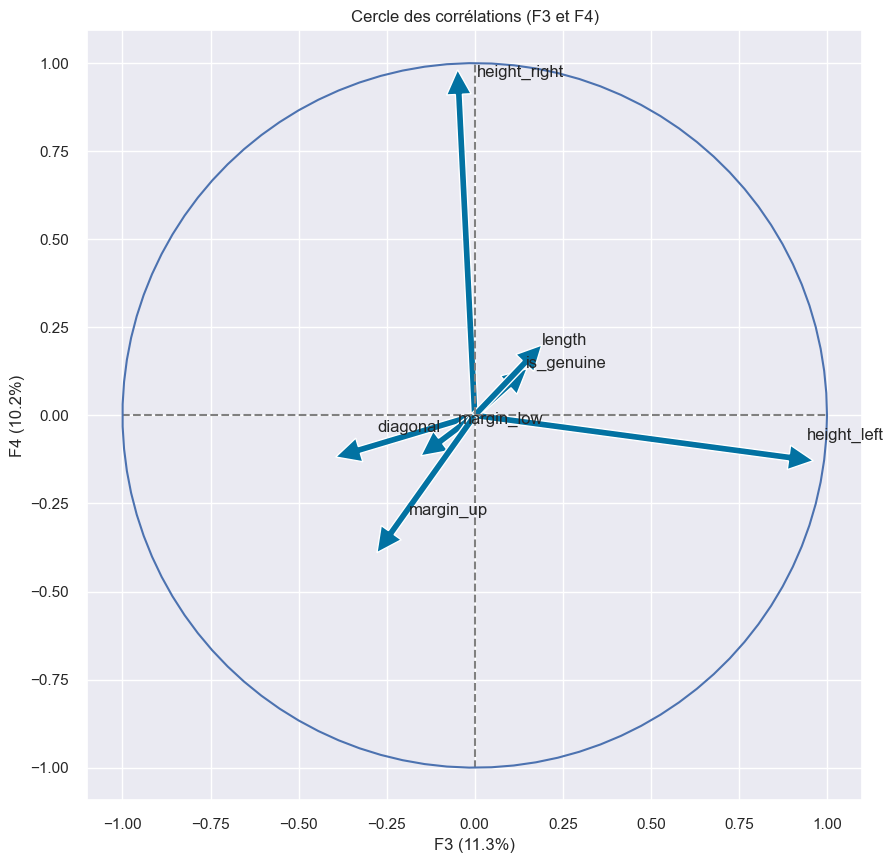

In [104]:
# à titre indicatif nous allons afficher le second cercle des corrélations qui au cumul explique 85% de la variance

correlation_graph(pca, (2,3), features)

### Projection 

In [105]:
# Nous allons maintenant définir la fonction de projection

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


In [106]:
#Création de notre vaiable de projection 

X_proj = pca.transform(X_Scaled)
X_proj[:5]

array([[ 0.96053909,  0.91875969,  2.84604409,  3.05747545, -0.11796902],
       [-2.05478852, -2.26917298, -1.01830732,  0.14017385, -0.01302022],
       [-1.21686257,  2.60735044,  0.98947807, -1.13552687,  0.85313366],
       [-1.55808347, -1.81280301,  0.75899228,  0.79649457, -0.65572095],
       [-0.23309996, -0.52240489,  0.83013974, -1.70085971, -1.38192014]])

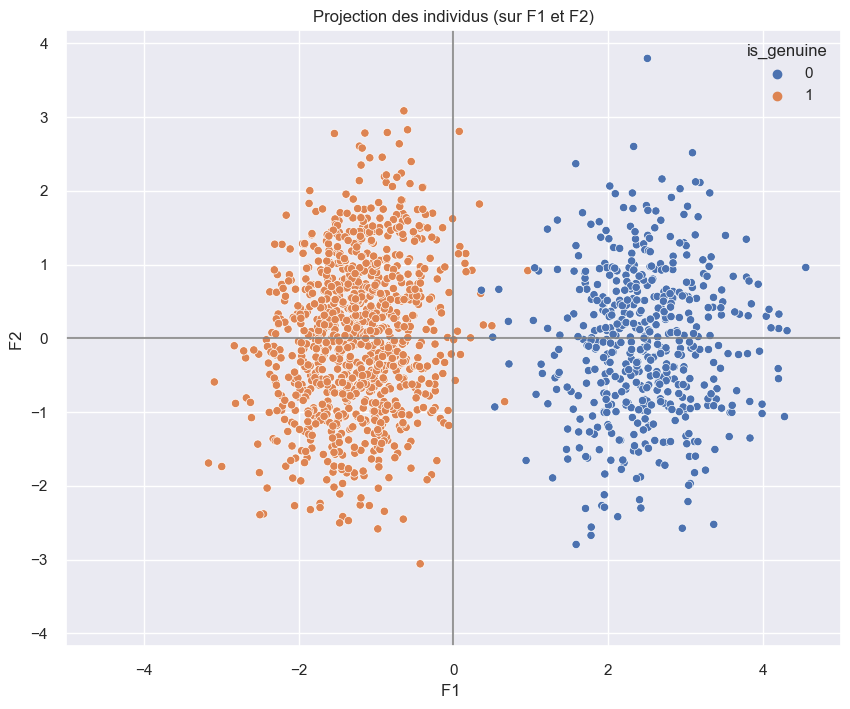

In [107]:
# Affichage Graphique
x_y = [0,1]
clusters=Df_Billet2['is_genuine']
display_factorial_planes(X_proj, x_y,clusters=clusters)

Nous pouvons voir nos deux ensembles se former avec leurs différentes tendances il sera intéressant d'analyser les clusters et leur centroïde pour mieux comprendre sur quoi nos deux ensembles varient

# Clustering Kmeans <a class="anchor" id="chapter4"></a>

K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster. 

In [108]:
# On sépare notre jeu de données

X=Df_Billet2.drop(columns='is_genuine')
y=Df_Billet2.is_genuine

In [109]:
# On commence à scale nos données

scaler_kmeans=StandardScaler()

In [110]:
X_scaled=scaler_kmeans.fit_transform(X)
X_scaled[:5]

array([[-0.48653957,  2.77412327,  3.16324041,  0.05546738, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08215668, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12655247, -0.91256208,
         0.55190114],
       [-1.96149786, -0.39929381,  0.06049835, -1.30968149, -0.61049399,
         0.95307539],
       [-0.74875438,  0.83666863, -1.41407214, -0.67261202,  1.41767746,
        -0.15875038]])

In [111]:
# Séparons nos données en un groupe d'entrainement et un groupe de test. 
 
X_scaled_trainK, X_scaled_testK, y_trainK, y_testK = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [112]:
# On vérifie que Moyennes= 0 et STD=1
idx=["mean","std"]
# Création Dataframe de IDX
pd.DataFrame(X_scaled_trainK).describe().round(1).loc[idx, :]

0    1    2    3    4    5
mean  0.0  0.0 -0.0 -0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [113]:
# On va enregistrer nos données d'entrînements

Billets_train=pd.DataFrame(X_scaled_trainK, columns=['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'])

Billets_train.head(5)

diagonal  height_left  height_right  margin_low  margin_up    length
0 -0.978192    -1.267808     -1.475513   -1.855741  -0.696799  0.242424
1 -1.305961    -1.969300      0.521302   -0.111384  -0.783104  1.044772
2 -1.830390     1.170713      0.828504    0.441800   0.079947 -0.330682
3 -0.191548     0.736455      2.210914   -0.035543  -0.351578 -2.084387
4  1.447295     0.469220      0.521302   -0.035543  -0.567341  0.551901

### La Méthode du Elbow <a class="anchor" id="section_4_1"></a>

In [114]:
# Une liste vide pour enregistrer les inerties :  
inertia_list = [ ]
silhouettes = []
# Notre liste de nombres de clusters : 
k_list = range(2, 8)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_scaled_trainK)
    
    # On enregistre l'inertie obtenue : 
    inertia_list.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled_trainK, kmeans.labels_))

In [115]:
# On fait apparaître notre liste d'inertie

inertia_list

[4698.159632703778,
 4103.367670026623,
 3758.1384067306094,
 3512.7023794314578,
 3298.545596620518,
 3156.91919167218]

Text(0.5, 1.0, 'Elbow Curve')

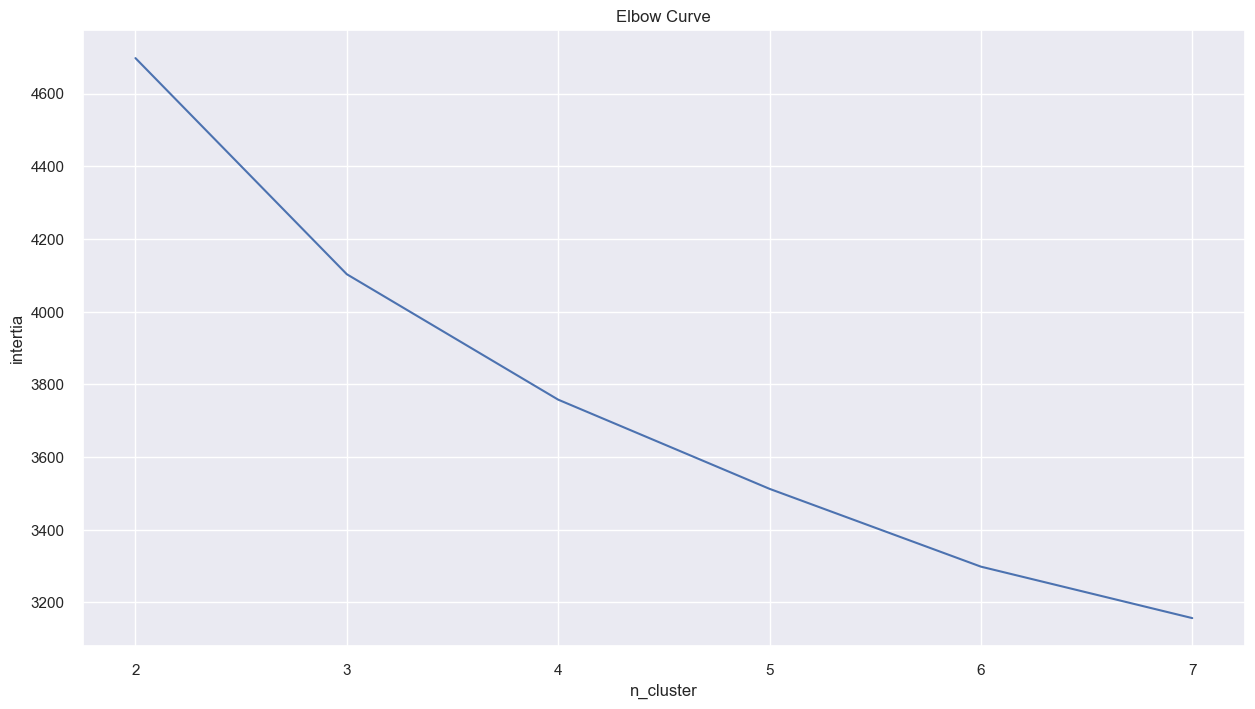

In [116]:
# Création du Graph Elbow curve simple 
fig, ax = plt.subplots(1,1,figsize=(15,8))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, inertia_list)

plt.title('Elbow Curve')

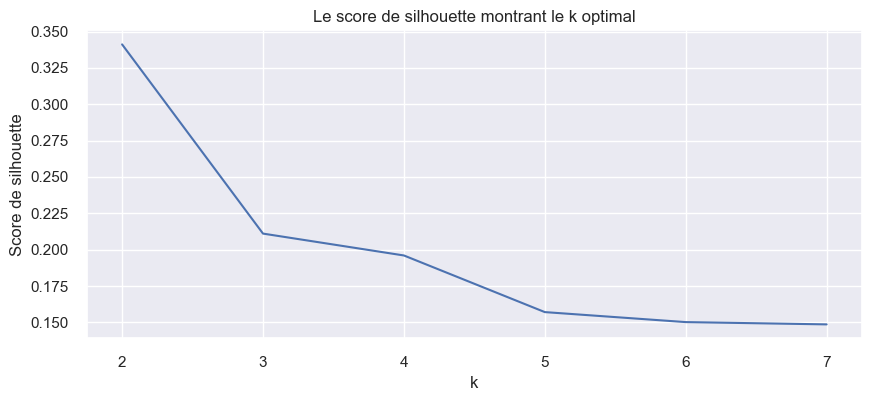

In [117]:
# Graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(k_list , silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

Le score de silhouette oscille entre 1 et -1 nous pouvons voir dans notre cas que le score reste assez faible et que deux choix s'offre principalement à nous soit 2 ou 3 clusters 

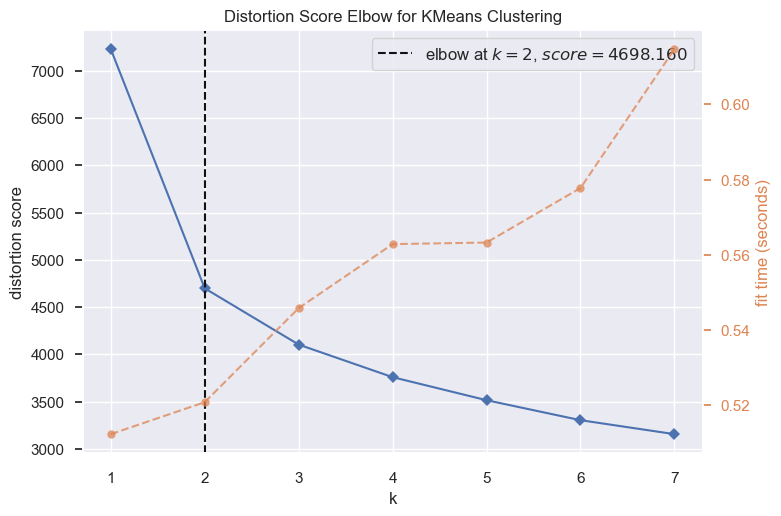

In [118]:
# Visualisation du Elbow avec précision
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(X_scaled_trainK)
visualizer.show()
plt.show()

La distorsion du score va nous donner le résultats exacte de cluster qui nous sera utile pour notre étude il sera au nombre de 2

In [119]:
# Nous allons maintenant mettre en place notre Kmeans

n_clusters= 2
mod_Kmeans=KMeans(n_clusters=n_clusters,random_state=42)

# On entrîne notre modèle

mod_Kmeans.fit(X_scaled_trainK,y_trainK)

KMeans(n_clusters=2, random_state=42)

In [120]:
# On prédit y_pred à partir de X_scaled_test

y_predK = mod_Kmeans.predict(X_scaled_testK)
y_predK

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [121]:
# On stock nos clusters dans une variable : 
labels = mod_Kmeans.labels_
labels


array([1, 1, 0, ..., 1, 0, 0])

In [122]:
Billets_train['Clusters']=labels
Billets_train.head()

diagonal  height_left  height_right  margin_low  margin_up    length  \
0 -0.978192    -1.267808     -1.475513   -1.855741  -0.696799  0.242424   
1 -1.305961    -1.969300      0.521302   -0.111384  -0.783104  1.044772   
2 -1.830390     1.170713      0.828504    0.441800   0.079947 -0.330682   
3 -0.191548     0.736455      2.210914   -0.035543  -0.351578 -2.084387   
4  1.447295     0.469220      0.521302   -0.035543  -0.567341  0.551901   

   Clusters  
0         1  
1         1  
2         0  
3         0  
4         1

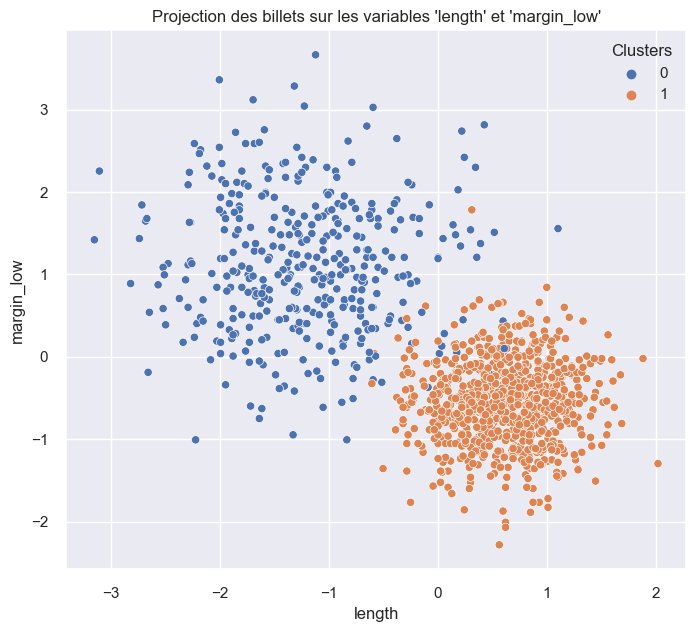

In [123]:
# Nous pouvons faire apparaître nos variables sur les quelles nous avons travaillés depuis le début il s'agit de length et margin_low

fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des billets sur les variables 'length' et 'margin_low'")
x_y = [0,1]
sns.scatterplot(data=Billets_train,x = 'length',y = 'margin_low', hue = "Clusters")
ax.set_xlabel("length")
ax.set_ylabel("margin_low")
plt.show()

In [124]:
# Avant de passer à la suite de la classification nous allons stocker nos centroids dans une variable : 

centroids = mod_Kmeans.cluster_centers_
centroids

array([[-0.19596345,  0.57852019,  0.72647448,  1.10376792,  0.84752674,
        -1.21290921],
       [ 0.11459753, -0.27236534, -0.35075253, -0.55830275, -0.42595573,
         0.60217114]])

In [125]:
centroids=pd.DataFrame(centroids,index=['Cluster_0','Cluster_1'],columns=['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'])
centroids.head()

diagonal  height_left  height_right  margin_low  margin_up  \
Cluster_0 -0.195963     0.578520      0.726474    1.103768   0.847527   
Cluster_1  0.114598    -0.272365     -0.350753   -0.558303  -0.425956   

             length  
Cluster_0 -1.212909  
Cluster_1  0.602171

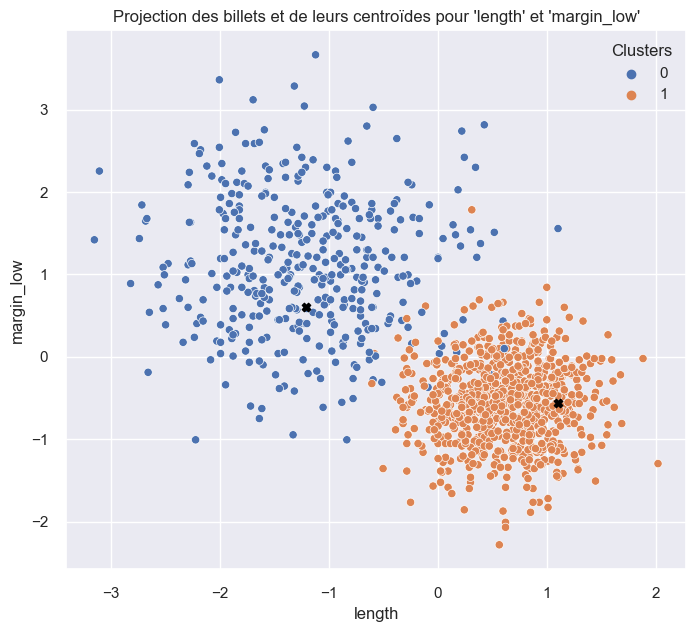

In [126]:
# On affiche le graphique pour les variables length et margin_low

# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des billets et de leurs centroïdes pour 'length' et 'margin_low'")


sns.scatterplot(data = Billets_train, x = 'length', y = 'margin_low', hue = 'Clusters')

# On affiche nos centroides, avec une couleur noire (c="black") et une forme de losange (marker="X") : 
ax.scatter(centroids.iloc[0, [3,5]], centroids.iloc[1,[3,5]],  marker="X", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("length")
ax.set_ylabel("margin_low")
plt.show()

On peut voir que le centroïde du nuage 1 est éloigné par rapport à la concentration de point à l'inverse on peut voir une forte concentration sur le nuage de point des 0 avec un centroïde qui tend vers le bas 

### Evaluation du Modèle<a class="anchor" id="section_4_2"></a>

In [127]:
# Création d'une fonction de matrice de confusion qui sera plusieurs fois utilisée

def my_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(cf_matrix, annot=True, fmt="g", cmap="coolwarm")
    plt.show()

In [128]:
# Définissons une fonction pour calculer la matrice de confusion sous forme de Dataframe

def confusion(y_test,y_pred) :
    """Affiche la matrice de confusion"""
    
    mat = confusion_matrix(y_test,y_pred)
    mat = pd.DataFrame(mat)
    mat.index = [f"test_{i}"for i in mat.index]
    mat.columns = [f"pred_{i}"for i in mat.columns]
    
    
    return mat

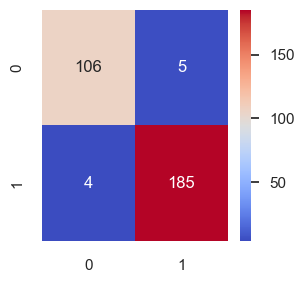

In [129]:
# Création de matrice de confusion pour Kmeans 

my_confusion_matrix(y_testK, y_predK) 


In [130]:
confusion(y_testK, y_predK)

pred_0  pred_1
test_0     106       5
test_1       4     185

### Calcul des scores <a class="anchor" id="section_4_3"></a>

Il exsite différente mesure qui peuvent accompagner la matrice de confusion pour analyser les performances 

L’accuracy : il indique le pourcentage de bonnes prédictions

La precision : est également appelée Positive Predictive Value. Elle correspond au taux de prédictions correctes parmi les prédictions positives

Le recall : est également appelé sensitivity (sensibilité). Il correspond au taux d’individus positifs détectés par le modèle 

Le F1-score : est une moyenne harmonique de la précision et du recall, il n’est élevé qu’à condition que ces deux indicateurs soient élevés.

In [131]:
accuracy_kmeans=accuracy_score(y_testK,y_predK)*100
print("Accuracy :",accuracy_kmeans)

Accuracy : 97.0


In [132]:
print("y_true :", y_testK[:10])

y_true : 1147    0
1403    0
432     1
423     1
462     1
885     1
1093    0
760     1
1305    0
265     1
Name: is_genuine, dtype: int64


In [133]:
print("y_pred :", y_predK[:10])

y_pred : [0 0 1 1 1 1 0 1 0 1]


In [134]:
precision_kmeans=precision_score(y_testK,y_predK).round(4)*100
print("Précision :", precision_kmeans)

Précision : 97.37


In [135]:
recall_kmeans=recall_score(y_testK,y_predK).round(4)*100
print("Recall :",recall_kmeans)

Recall : 97.88


In [136]:
f1_score_kmeans=f1_score(y_testK,y_predK).round(4)*100
print("F1_score :",f1_score_kmeans)

F1_score : 97.63


Nous avons donc ici des scores très élevé concernant notre modèle avec un score moyen de 97%

### Courbe ROC <a class="anchor" id="section_4_4"></a>

La courbe ROC permet de visualiser comment la spécificité et la sensibilité d’un modèle évolue en fonction de ce seuil.

In [137]:
# On définit notre courbe Roc afin de l'utiliser sur d'autre modèle 

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
   

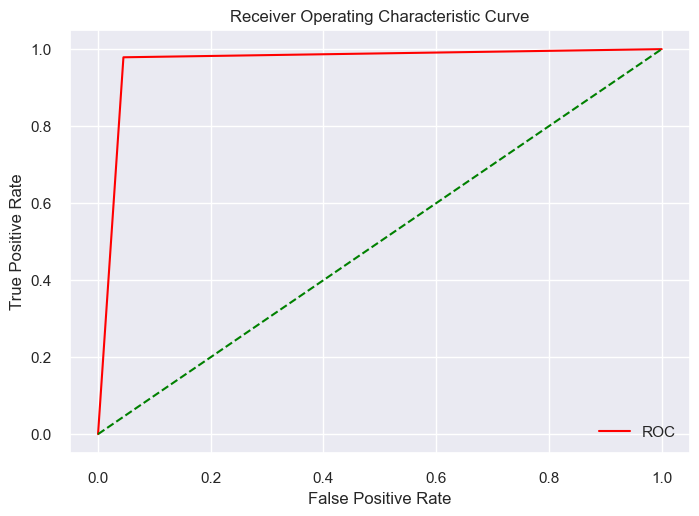

Kmeans :  ROC AUC=96.690


In [138]:
fper, tper, thresholds = roc_curve(y_testK,y_predK)
plot_roc_curve(fper, tper)
K_auc = roc_auc_score(y_testK, y_predK)*100
print("Kmeans :  ROC AUC=%.3f"%(K_auc))

In [139]:
# Calculons la performance de notre modèle avec l'AUC ROC.
# L'AUC ROC va mesurer la performance globale de notre modèle, il correspond à l'air sous la courbe 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_testK,y_predK)
K_auc=auc(fper, tper).round(4)*100
print("L'AUC ROC de notre Kmeans est de :",K_auc)

L'AUC ROC de notre Kmeans est de : 96.69


L'estimateur semble correcte, serait intéressant de comparer notre modèle avec d'autre méthode

# Regression Logisitque <a class="anchor" id="chapter5"></a>

La régression logistique est un modèle statistique de classification permettant d’étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. Il s’agit d’un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien. 

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive ou non à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1.

### Création du modèle <a class="anchor" id="section_5_1"></a>

In [140]:
# On sépare notre jeu de données 

X_log=Df_Billet2.drop(columns=['is_genuine'])
y_log=Df_Billet2.is_genuine

In [141]:
# on stardadise nos données X 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.05546738, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08215668, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12655247, -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.84368096,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  1.07915577,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  0.96723236,  0.38201544,
        -1.36227312]])

In [142]:
# Séparons nos données en un groupe d'entrainement et un groupe de test. 
 
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_scaled,
                                                    y_log,
                                                    test_size=0.2,
                                                    random_state=42)

### GridsearchCv <a class="anchor" id="section_5_2"></a>

 Grid search consiste à optimiser les hyperparamètres sur nos données en entraînant successivement plusieurs modèles et à comparer leurs résultats.

In [143]:

estimateur = LogisticRegression()

score='accuracy'
param_grid = {'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
              'penalty' : ['l1', 'l2', 'elasticnet', None],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimateur,param_grid, cv=5,scoring=score,verbose=0)
grid.fit(X_train_log, y_train_log)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [144]:
print("Meilleurs paramètres :",grid .best_params_)
print("Meilleur score (accuracy):",round(grid .best_score_,4))

Meilleurs paramètres : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Meilleur score (accuracy): 0.9917


In [145]:
modelRegLog=grid.best_estimator_
round(modelRegLog.score(X_test_log,y_test_log),4)*100

99.0

In [146]:
# On enregistre les prédictions dans une variable y_pred
y_pred_log = modelRegLog.predict(X_test_log)

# On vérifie le score de notre model sur les données Test (F1 score)
f1_reglog = f1_score(y_test_log, y_pred_log)
f1_reglog = round(f1_reglog*100,4)
print("Le score de notre model sur les données Test est de :", f1_reglog,"%")

Le score de notre model sur les données Test est de : 99.2042 %


### Evaluation du Modèle<a class="anchor" id="section_5_3"></a>

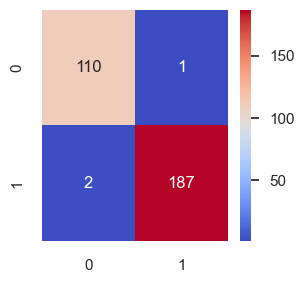

In [147]:
my_confusion_matrix(y_test_log,y_pred_log)

In [148]:
confusion(y_test_log,y_pred_log)

pred_0  pred_1
test_0     110       1
test_1       2     187

Le nombre d'erreur concernant le modèle de régression logisitque que sur le modèle précédent

In [149]:
y_prob = grid.predict_proba(X_test_log).round(2)
y_prob

array([[0.99, 0.01],
       [0.82, 0.18],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.06, 0.94],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.13, 0.87],
       [1.  , 0.  ],
       [0.17, 0.83],
       [0.99, 0.01],
       [0.02, 0.98],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.97, 0.03],
       [0.57, 0.43],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01,

### Calcul des scores <a class="anchor" id="section_5_4"></a>

In [150]:
accuracy_Reglog=accuracy_score(y_test_log,y_pred_log)*100
print("Accuracy :",accuracy_Reglog)

Accuracy : 99.0


In [151]:
precision_Reglog=precision_score(y_test_log,y_pred_log).round(4)*100
print("Précision :", precision_Reglog)

Précision : 99.47


In [152]:
recall_Reglog=recall_score(y_test_log,y_pred_log).round(4)*100
print("Recall :",recall_Reglog)

Recall : 98.94


In [153]:
f1_score_Reglog=f1_score(y_test_log,y_pred_log).round(4)*100
print("F1_score :",f1_score_Reglog)

F1_score : 99.2


### Courbe ROC <a class="anchor" id="section_5_5"></a>

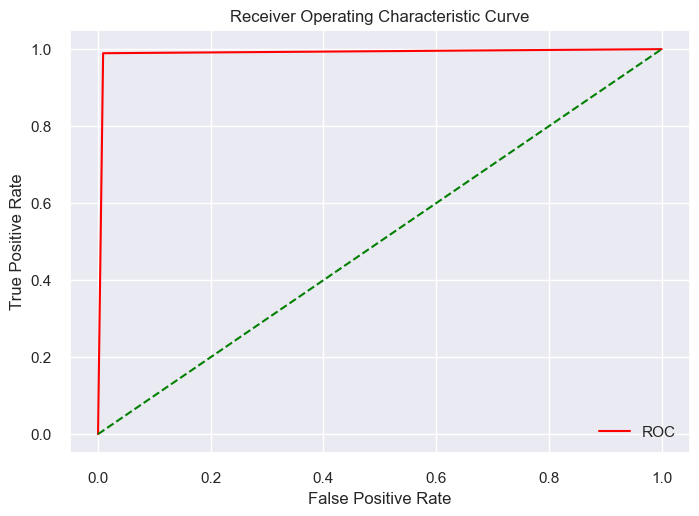

Reg_Log:  ROC AUC=99.020


In [154]:
fper, tper, thresholds = roc_curve(y_test_log,y_pred_log)
plot_roc_curve(fper, tper)
RegL_auc = roc_auc_score(y_test_log,y_pred_log)*100
print("Reg_Log:  ROC AUC=%.3f"%(RegL_auc))

In [155]:
# Calculons la performance de notre modèle avec l'AUC ROC.
# L'AUC ROC va mesurer la performance globale de notre modèle, il correspond à l'air sous la courbe 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_log,y_pred_log)
RegLog_auc=auc(fper, tper).round(4)*100
print("L'AUC ROC de notre Regression Logistique est de :",RegLog_auc)

L'AUC ROC de notre Regression Logistique est de : 99.02


# KNN <a class="anchor" id="chapter6"></a>

Le modèle k-NN (k-Nearest Neighbors) est un algorithme de classification supervisée utilisé pour prédire l'étiquette de classe d'un nouvel exemple en fonction de ses k voisins les plus proches dans un ensemble de données d'entraînement.

### Création du modèle <a class="anchor" id="section_6_1"></a>

In [156]:
#Nous pouvons repartir du modèle optimisé que nous avons mis en place avec la régression Logistique 

X_knn=Df_Billet2.drop(columns=['is_genuine'])
y_knn=Df_Billet2.is_genuine

In [157]:
# On standardise nos données X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_knn)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.05546738, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08215668, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12655247, -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.84368096,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  1.07915577,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  0.96723236,  0.38201544,
        -1.36227312]])

In [158]:
#Séparons nos données en un groupe d'entrainement et un groupe de test. 
 
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled,
                                                    y_knn,
                                                    test_size=0.2,
                                                    random_state=42)

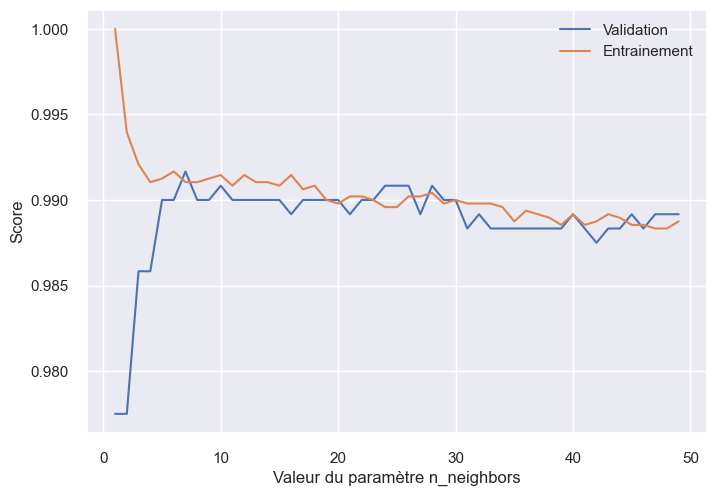

In [159]:
KNN = KNeighborsClassifier()
k = np.arange(1,50)

train_score,val_score = validation_curve(KNN , X_train_knn ,y_train_knn, param_name='n_neighbors', param_range=k, cv = 5)

plt.plot(k,val_score.mean(axis = 1), label= 'Validation')
plt.plot(k,train_score.mean(axis = 1), label = 'Entrainement')

plt.ylabel('Score')
plt.xlabel('Valeur du paramètre n_neighbors')
plt.legend()

On repère les cas d'overfitting lorsque la courbe d'entraînement est plus forte que la courbe de validation.

Ici avec n_neighbors= 7 on voit que la courbe de validation semble interessante

In [160]:
cross_val_score(KNeighborsClassifier(7),X_train_knn,y_train_knn, cv=5).mean()

0.9916666666666666

Pour être sur de notre méthode nous allons optimiser notre modèle avec GridsearchCV

### GridsearchCv <a class="anchor" id="section_6_2"></a>

In [161]:
param_grid={'n_neighbors': np.arange(1,30),
         'metric':['euclidean','manhattan']}

grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring='accuracy')

In [162]:
grid.fit(X_train_knn,y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

In [163]:
print("Meilleurs paramètres :",grid .best_params_)
print("Meilleur score (accuracy):",round(grid .best_score_*100))

Meilleurs paramètres : {'metric': 'euclidean', 'n_neighbors': 7}
Meilleur score (accuracy): 99


In [164]:
model_knn=grid.best_estimator_

In [165]:
model_knn.score(X_test_knn,y_test_knn)*100

98.66666666666667

Nous pouvons voir que nous avons un modèle qui atteint les 99% de vérification 

### Evaluation du Modèle<a class="anchor" id="section_6_3"></a>

In [166]:
# On enregistre les prédictions dans une variable y_pred
y_pred_knn = model_knn.predict(X_test_knn)

# On vérifie le score de notre model sur les données Test (F1 score)
score_f1 = f1_score(y_test_knn, y_pred_knn)
score_f1 = round(score_f1*100,4)
print("Le score de notre model sur les données Test est de :", score_f1,"%")

Le score de notre model sur les données Test est de : 98.9418 %


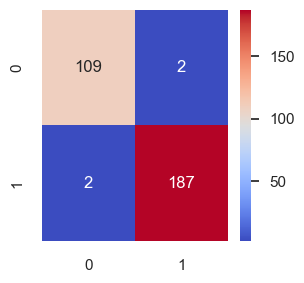

In [167]:
my_confusion_matrix(y_test_knn,y_pred_knn)

Nous pouvons voir que le modèle à une performance plus interessante que le Kmeans et La Rgression Logistique 

In [168]:
confusion(y_test_knn,y_pred_knn)

pred_0  pred_1
test_0     109       2
test_1       2     187

In [169]:
 # On peut déterminer la probalbilité d'un d'être vrai ou faux 
    
y_prob = grid.predict_proba(X_test_knn).round(2)*100
y_prob

array([[100.,   0.],
       [ 86.,  14.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [100.,   0.],
       [100.,   0.],
       [ 57.,  43.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [100.,   0.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [  0.,

### Calcul des scores <a class="anchor" id="section_6_4"></a>

In [170]:
accuracy_kNN=accuracy_score(y_test_knn,y_pred_knn)*100
print("Accuracy :",accuracy_kNN)

Accuracy : 98.66666666666667


In [171]:
precision_kNN=precision_score(y_test_knn,y_pred_knn).round(4)*100
print("Précision :", precision_kNN)

Précision : 98.94


In [172]:
recall_kNN=recall_score(y_test_knn,y_pred_knn).round(4)*100
print("Recall :",recall_kNN)

Recall : 98.94


In [173]:
f1_score_kNN=f1_score(y_test_knn,y_pred_knn).round(4)*100
print("F1_score :",f1_score_kNN)

F1_score : 98.94


### Courbe ROC <a class="anchor" id="section_6_5"></a>

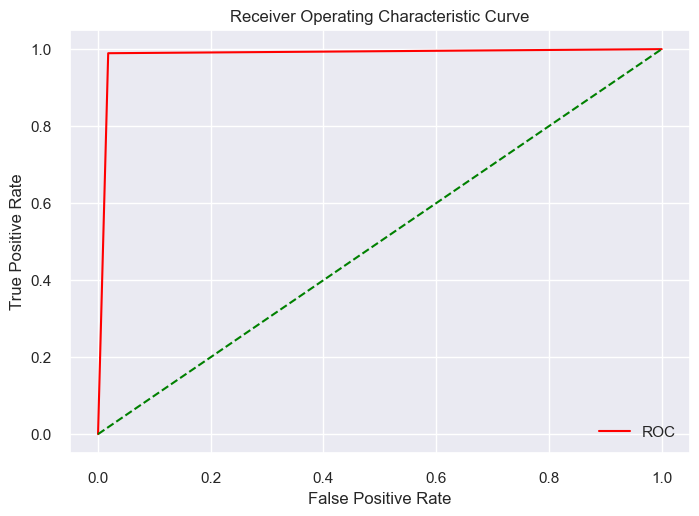

Knn :  ROC AUC=98.570


In [174]:
fper, tper, thresholds = roc_curve(y_test_knn,y_pred_knn)
plot_roc_curve(fper, tper)
Knn_auc = roc_auc_score(y_test_knn, y_pred_knn)*100
print("Knn :  ROC AUC=%.3f"%(Knn_auc))

In [175]:
# Calculons la performance de notre modèle avec l'AUC ROC.
# L'AUC ROC va mesurer la performance globale de notre modèle, il correspond à l'air sous la courbe 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_knn,y_pred_knn)
Knn_auc=auc(fper, tper).round(4)*100
print("L'AUC ROC de notre Knn est de :",Knn_auc)

L'AUC ROC de notre Knn est de : 98.57000000000001


## Comparaison des modèles <a class="anchor" id="chapter7"></a>

In [176]:
cols=['Kmeans','Régression Logistique','KNN']

index=['Accuracy','Precison','Recall','F1_Score','Auc_Roc']

Perf_modèle=pd.DataFrame(index=index,columns=cols)

Perf_modèle['Kmeans']=[accuracy_kmeans,precision_kmeans,recall_kmeans,f1_score_kmeans,K_auc]
Perf_modèle['Régression Logistique']=[accuracy_Reglog,precision_Reglog,recall_Reglog,f1_score_Reglog,RegLog_auc]
Perf_modèle['KNN']=[accuracy_kNN,precision_kNN,recall_kNN,f1_score_kNN,Knn_auc]


Perf_modèle

Kmeans  Régression Logistique        KNN
Accuracy   97.00                  99.00  98.666667
Precison   97.37                  99.47  98.940000
Recall     97.88                  98.94  98.940000
F1_Score   97.63                  99.20  98.940000
Auc_Roc    96.69                  99.02  98.570000

A travers nos différentes métriques et les matrices de confusion le modèle le plus performants est celui de la Régression Logistique 

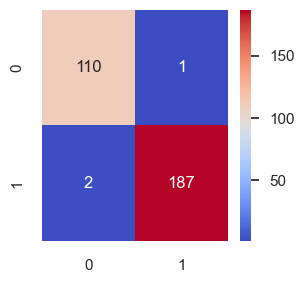

In [177]:
my_confusion_matrix(y_test_log,y_pred_log)

La matrice de confusion ici nous montre une marge d'erreur faible quand au faux negetif: FN et au Faux Positif : FP

# Modèle Finale 

In [178]:
# Nous allons sauvegarder notre modèle Finale 


with open('Régression_logistique', 'wb') as file:
    pickle.dump(modelRegLog, file)

In [180]:
# Nous allons définir notre Fonction pour prédire

def Prediction_Billet(Df):
    X=Df[['diagonal','height_left','height_right','margin_low','margin_up','length']] # création du dataframe
    X_fit=scaler.fit_transform(X) # On entraîne et transforme nos données
    
    prediction_X=modelRegLog.predict(X_fit) # création de la variable de prediction
    probabilité_X=modelRegLog.predict_proba(X_fit)[:,1]*100 # création de la variable de probabilité
    
    Df['Prédiction']=prediction_X # ajout de la variable predict au dataframe
    Df['Prédiction']=Df['Prédiction'].replace([1,0],[True,False]) # On remet True et False en sortie
    
    Df['Probabilité']=probabilité_X # ajout de la variable proba au dataframe
   

    Df=Df.reindex(columns=['id','diagonal','height_left','height_right','margin_low','margin_up','length','Prédiction','Probabilité'])
    # On réindexe nos colonnes pour une meilleur lisibilité 
    return Df

In [182]:
# Billet_test = pd.read_csv('',sep=',',decimal='.')

In [184]:
# Prediction_Billet(Billet_test)